                                            DATA MINING PROJECT - 2021748, IBRAHIM MAHMOOD

- Latex Report on Overleaf: [Template Link](https://www.overleaf.com/read/tptjxdncjrcf#b11f00). Copy the latex file and make a new one in your overleaf account to begin editing.

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score, precision_score, recall_score, f1_score, pairwise_distances_argmin_min
from scipy.stats import zscore, shapiro, ttest_ind, probplot
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN
import statsmodels.api as sm
from wordcloud import WordCloud
import plotly.express as px
from memory_profiler import profile
import time
from collections import Counter
import networkx as nx
from sklearn.tree import DecisionTreeRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from pyECLAT import ECLAT
from pymining import seqmining
from prefixspan import PrefixSpan
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\sem5\DM\proj\supermarket_sales - Sheet1.csv")

In [4]:
viz_df = df.copy()
ap_df = df.copy()
df5 = df.copy()
clustering_df = df.copy()

            1) DATA CLEANING, PREPROCESSING AND EDA
        
                    1.1) EDA

In [181]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [182]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [183]:
df.info()       # Some general information about our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [185]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [262]:
print(df.isnull().sum())        # Checking NaN values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [263]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [264]:
print(df.duplicated().sum())        # Checking redundancy in the dataset

0


In [265]:
numeric_columns = df.select_dtypes(include=['number']).columns
z_scores_df = df[numeric_columns].apply(zscore)
threshold = 3
outliers_df = df[(abs(z_scores_df) > threshold).any(axis=1)]

print("Outliers:")
outliers_df

Outliers:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


There are no outliers.

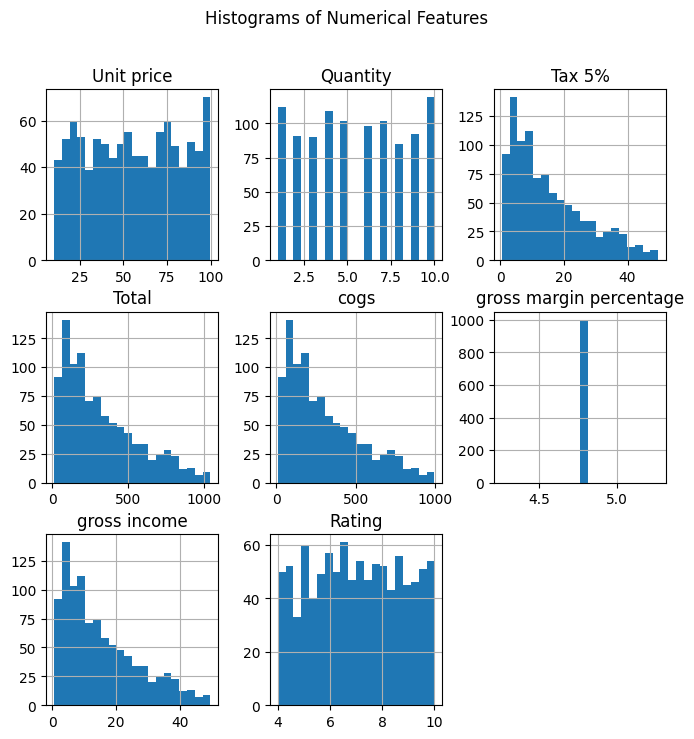

In [266]:
# Visualizing the distribution of numerical features:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=20, figsize=(8, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [267]:
# Visualize the correlation matrix
corr_matrix = df[num_cols].corr()
corr_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



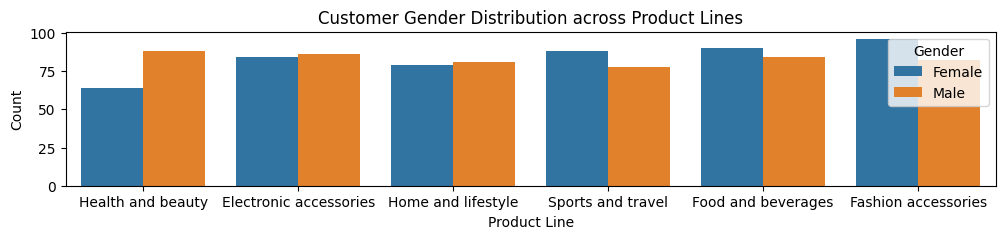

In [268]:
# Customer gender distribution across product lines:
plt.figure(figsize=(12, 2))  
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Customer Gender Distribution across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

In [269]:
# Time-based analysis:
df['Date'] = pd.to_datetime(df['Date'])
time_analysis = df.groupby('Date').agg({'Total': 'sum', 'Quantity': 'sum'}).reset_index()
fig = px.line(time_analysis, x='Date', y=['Total', 'Quantity'], title='Time-based Analysis', labels={'value': 'Amount'})
fig.update_layout(width=800, height=300)
fig.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



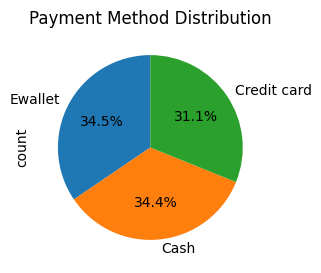

In [270]:
# Payment method distribution:
plt.figure(figsize=(6, 3))  
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.show()

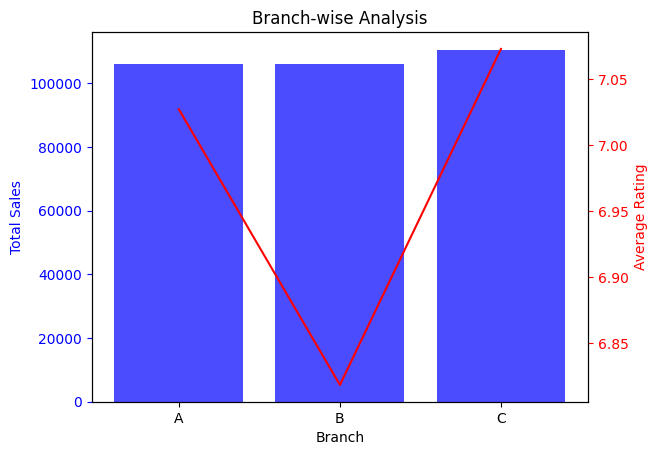

In [271]:
branch_analysis = df.groupby('Branch').agg({'Total': 'sum', 'Rating': 'mean'}).reset_index()
fig, ax1 = plt.subplots()

ax1.bar(branch_analysis['Branch'], branch_analysis['Total'], color='b', alpha=0.7, label='Total Sales')
ax1.set_xlabel('Branch')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(branch_analysis['Branch'], branch_analysis['Rating'], color='r', label='Average Rating')
ax2.set_ylabel('Average Rating', color='r')
ax2.tick_params('y', colors='r')

plt.title('Branch-wise Analysis')
plt.show()

In [272]:
# Interactive Visualizations:
fig = px.scatter(df, x='Quantity', y='Total', color='Branch', hover_data=['Product line'], title='Scatter Plot')
fig.update_layout(width=500, height=450)
fig.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



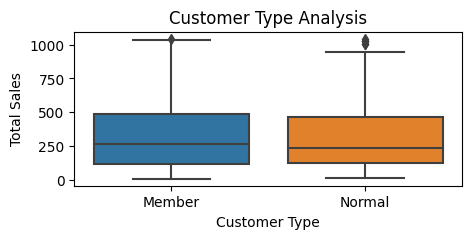

In [273]:
# Customer Type Analysis
plt.figure(figsize=(5, 2))
sns.boxplot(x='Customer type', y='Total', data=df)
plt.title('Customer Type Analysis')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

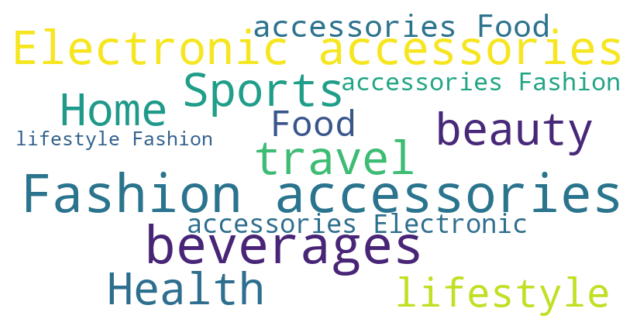

In [274]:
# Word Cloud for Product Line Names:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Product line']))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

                    1.2) Data Cleaning

In [69]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour

In [70]:
df = df.drop(['Invoice ID', 'Date', 'Year', 'Time'], axis=1)

Since there are no NULL values and no duplicates, as seen in the EDA, we can skip those steps.

In [277]:
apriori_df = df.copy()
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10


In [71]:
df[['Month','Day','Hour']].head()

,Month,Day,Hour
0,1,5,13
1,3,8,10
2,3,3,13
3,1,27,20
4,2,8,10


                    1.3) Encoding

In [279]:
print('DISTINCT VALUES BY COLUMN:\n--------------------------')
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values}")

DISTINCT VALUES BY COLUMN:
--------------------------
Branch: 3
City: 3
Customer type: 2
Gender: 2
Product line: 6
Unit price: 943
Quantity: 10
Tax 5%: 990
Total: 990
Payment: 3
cogs: 990
gross margin percentage: 1
gross income: 990
Rating: 61
Month: 3
Day: 31
Hour: 11


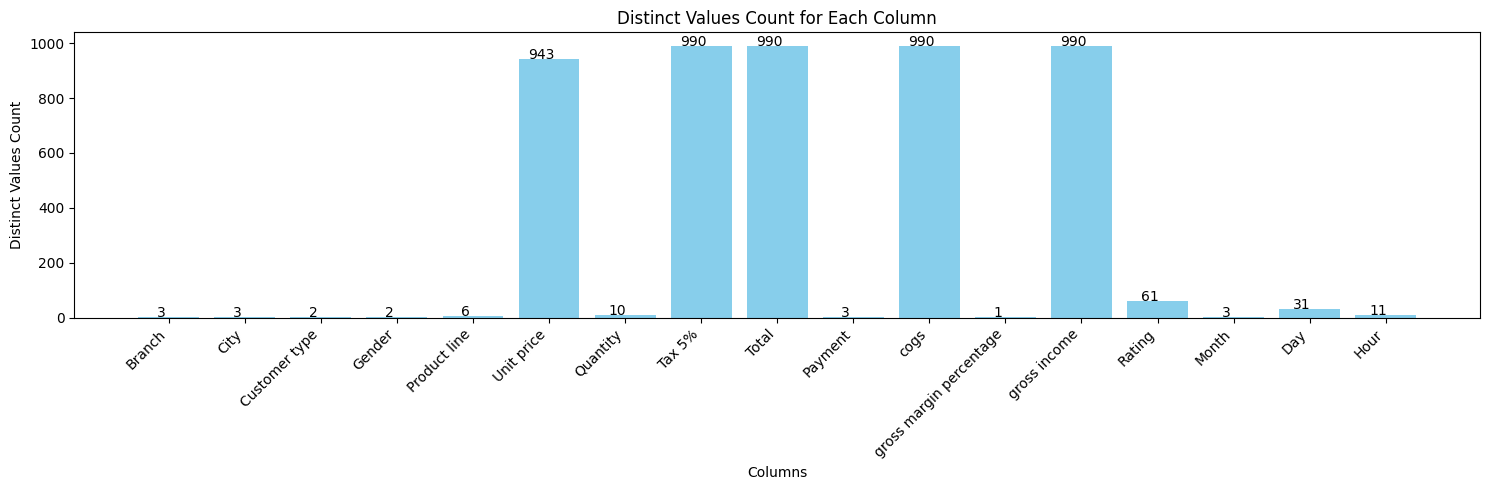

In [280]:
distinct_value_counts = [df[column].nunique() for column in df.columns]

plt.figure(figsize=(15, 5))
bars = plt.bar(df.columns, distinct_value_counts, color='skyblue')
plt.title('Distinct Values Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Distinct Values Count')
plt.xticks(rotation=45, ha='right') 

# Adding text annotations on each bar
for bar, count in zip(bars, distinct_value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), ha='center', color='black')

plt.tight_layout()

plt.show()

As we can see, 'gross market percentage' feature has a single value throughout the dataset. Hence, it is of no use to us, so I'll drop it:

In [72]:
df = df.drop(['gross margin percentage'], axis=1)

In [73]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Numeric Cols
num_cols_with_rating = num_cols.union(pd.Index(['Rating', 'Day', 'Month', 'Hour']))

corr_matrix = df[num_cols_with_rating].corr().loc[['Total'], num_cols_with_rating]
corr_matrix

,Day,Hour,Month,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income
Total,-0.002515,-0.00277,-0.022301,0.70551,-0.036442,1.0,1.0,0.633962,1.0,1.0


In [283]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8,10


-> Using One-Hot Encoding Encoding for the columns 'Customer Type', 'Day', 'Month' and 'Hour'.                                                                                    
-> Using Label Encoding for the columns 'Day', 'Month' and 'Hour'

In [74]:
ordinal_columns = ['Customer type', 'Day', 'Month', 'Hour']  # Add other ordinal columns here
nominal_columns = ['Branch', 'City', 'Gender', 'Product line', 'Payment']  # Add other nominal columns here

# Create a copy of the original DataFrame
encoded_df = df.copy()

# Convert ordinal columns using Label Encoding for both DataFrames
label_encoder = LabelEncoder()
for col in ordinal_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Convert nominal columns using One-Hot Encoding for the new DataFrame
encoded_df = pd.get_dummies(encoded_df, columns=nominal_columns, drop_first=True)

# Convert boolean columns to 0s and 1s
encoded_df = encoded_df.astype(int)

# Display the encoded DataFrame
encoded_df.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0,74,7,26,548,522,26,9,0,4,...,0,1,0,0,0,1,0,0,0,1
1,1,15,5,3,80,76,3,9,2,7,...,1,0,0,0,0,0,0,0,0,0
2,1,46,7,16,340,324,16,7,2,2,...,0,1,1,0,0,0,1,0,1,0
3,0,58,8,23,489,465,23,8,0,26,...,0,1,1,0,0,1,0,0,0,1
4,1,86,7,30,634,604,30,5,1,7,...,0,1,1,0,0,0,0,1,0,1


In [75]:
outlier_df = encoded_df.copy()
df2_1 = outlier_df.copy()

                    1.4) Standardization

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\

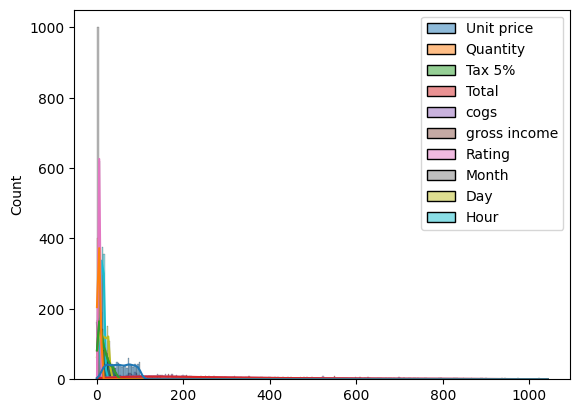

In [286]:
sns.histplot(df, kde=True)
plt.show()

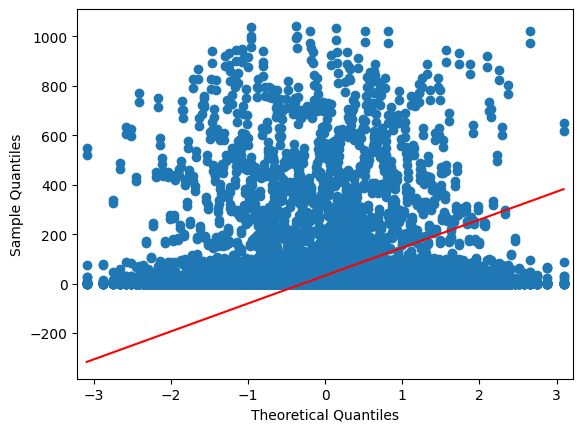

In [287]:
sm.qqplot(encoded_df, line='s')
plt.show()

In [288]:
stat, p_value = shapiro(encoded_df)

# Check the p-value
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


Shapiro-Wilk Test: Statistic=0.31571829319000244, p-value=0.0
The data does not appear to be normally distributed.


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



In [289]:
print("N:", len(encoded_df))

N: 1000


In [77]:
df_standardized = encoded_df.copy()
cols_to_standardize = df_standardized.columns.difference(['Total'])
scaler = StandardScaler()
df_standardized[cols_to_standardize] = scaler.fit_transform(df_standardized[cols_to_standardize])

df_standardized.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,-0.998002,0.711694,0.509930,0.951427,548,0.918142,0.951427,1.463146,-1.189455,-1.180314,...,-0.698638,1.393261,-0.998002,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.671847,1.377879
1,1.002002,-1.517427,-0.174540,-1.013096,80,-0.987284,-1.013096,1.463146,1.206225,-0.835058,...,1.431356,-0.717741,-0.998002,-0.465344,-0.45897,-0.423374,-0.436436,-0.44614,-0.671847,-0.725753
2,1.002002,-0.346194,0.509930,0.097287,340,0.072235,0.097287,0.276972,1.206225,-1.410484,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,1.488433,-0.725753
3,-0.998002,0.107187,0.852165,0.695185,489,0.674624,0.695185,0.870059,-1.189455,1.351560,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.671847,1.377879
4,1.002002,1.165074,0.509930,1.293083,634,1.268467,1.293083,-0.909202,0.008385,-0.835058,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,-0.423374,-0.436436,2.24145,-0.671847,1.377879


In [291]:
scaler.mean_

array([3.32000e-01, 3.28000e-01, 3.28000e-01, 3.40000e-01, 4.99000e-01,
       1.42560e+01, 4.99000e-01, 4.91000e+00, 9.93000e-01, 3.11000e-01,
       3.45000e-01, 1.78000e-01, 1.74000e-01, 1.52000e-01, 1.60000e-01,
       1.66000e-01, 5.51000e+00, 6.53300e+00, 1.48610e+01, 5.51630e+01,
       3.07092e+02, 1.48610e+01])

In [292]:
scaler.scale_

array([  0.47093099,   0.46948482,   0.46948482,   0.47370877,
         0.499999  ,   8.68921538,   0.499999  ,   3.18526294,
         0.83483591,   0.4629028 ,   0.47536828,   0.38251274,
         0.37910948,   0.35902089,   0.36660606,   0.37208064,
         2.92196851,   1.68609341,  11.70767607,  26.46783767,
       234.06832664,  11.70767607])

In [293]:
np.random.seed(42)
examples_df = df_standardized.sample(n=5, random_state=42)
standardized_df = df_standardized.drop(examples_df.index)

In [78]:
df_standardized2 = df_standardized.copy()
df_classif = df_standardized.copy()
clustering_df = df_standardized.copy()

                    1.5) Feature Selection

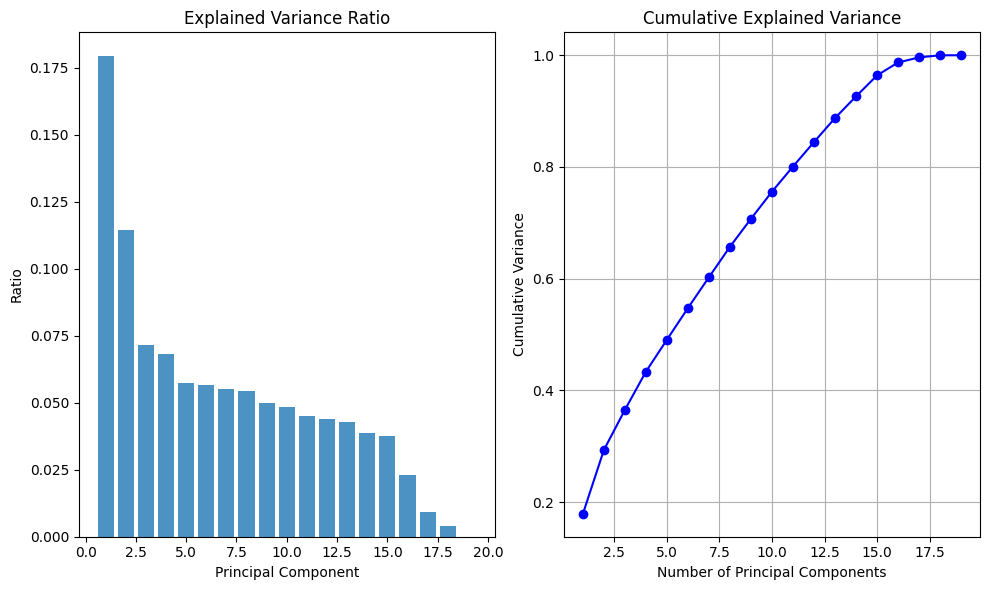

In [295]:
X = df_standardized2.drop(['Total'], axis=1)  
y = df_standardized2['Total'] 
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pca.fit_transform(X)

# Scree plot:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

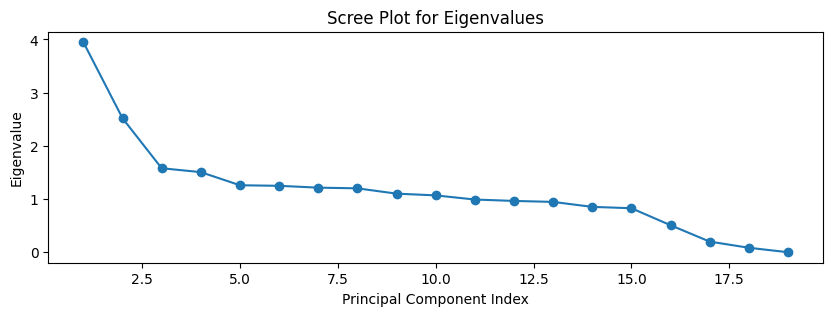

In [296]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

plt.figure(figsize=(10, 3))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Eigenvalues')
plt.show()

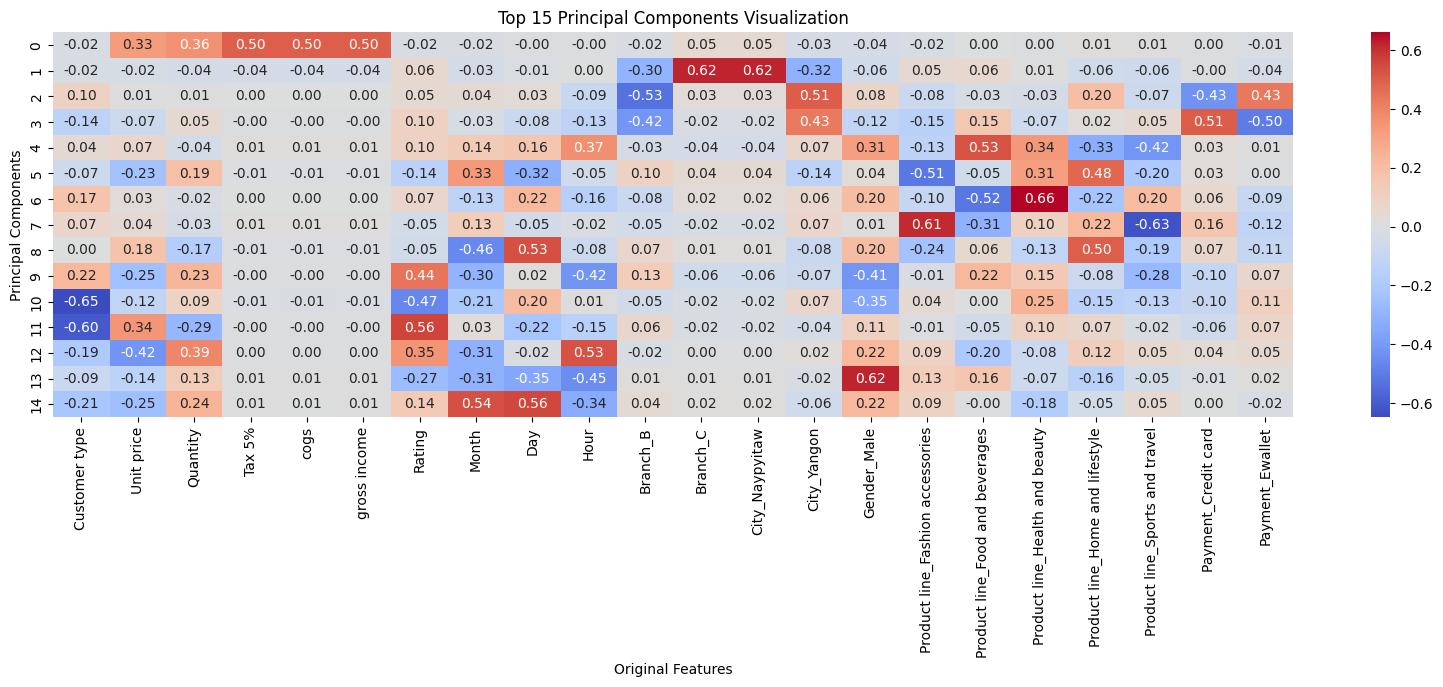

In [297]:
n_top_components = 15  # Choose the number of top components to visualize

top_components = pd.DataFrame(eigenvectors[:n_top_components, :], columns=X.columns)
plt.figure(figsize=(20, 5))
sns.heatmap(top_components, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title(f'Top {n_top_components} Principal Components Visualization')
plt.show()

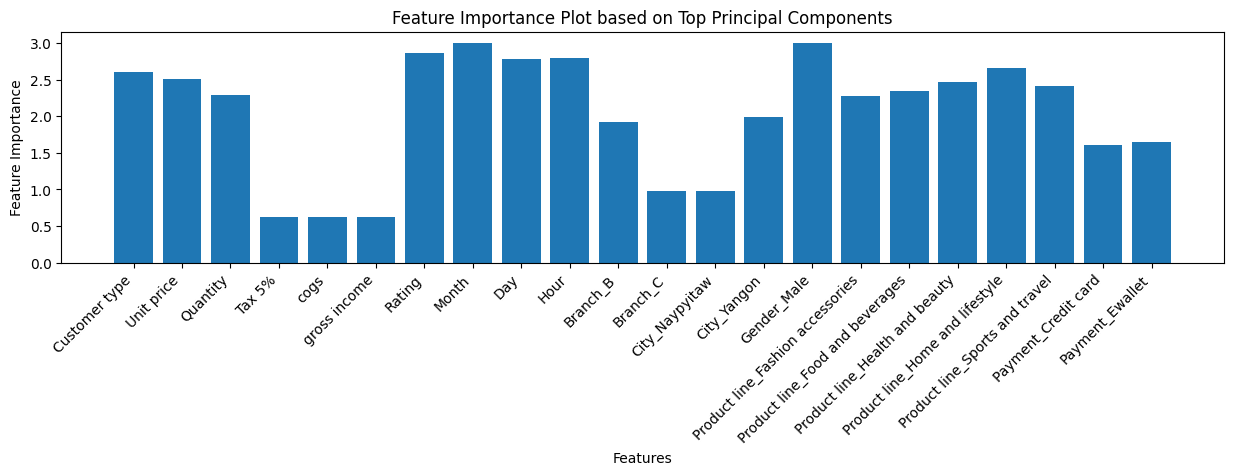

In [298]:
feature_importance = np.abs(eigenvectors[:n_top_components, :]).sum(axis=0)

plt.figure(figsize=(15, 3))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot based on Top Principal Components')
plt.xticks(rotation=45, ha='right')
plt.show()

                    1.6) Splitting into Training and Testing Sets

In [92]:
X = df_standardized.drop('Total', axis=1)
y = df_standardized['Total']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 22)
X_test shape: (200, 22)
y_train shape: (800,)
y_test shape: (200,)


            2) VISUALIZATION

In [300]:
df2 = viz_df.copy()

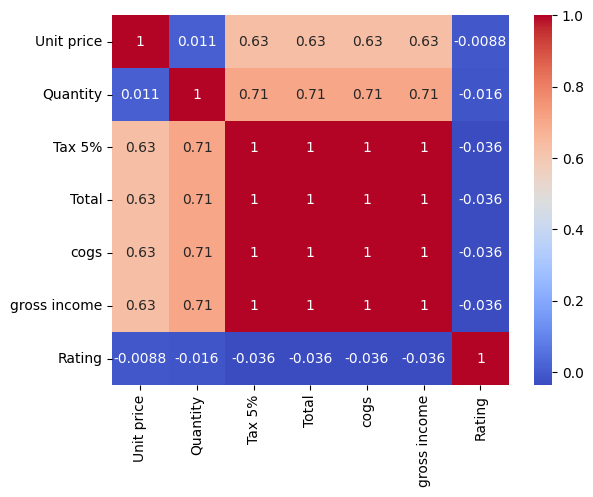

In [301]:
num_cols = df2.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df2[num_cols].corr()
corr_matrix = corr_matrix.drop('gross margin percentage', axis=1)
corr_matrix = corr_matrix.drop('gross margin percentage', axis=0)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



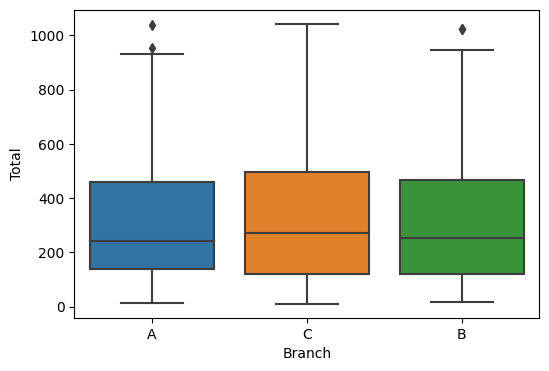

In [302]:
# Box Plots
plt.figure(figsize=(6, 4))
sns.boxplot(x="Branch", y="Total", data=df2)
plt.show()

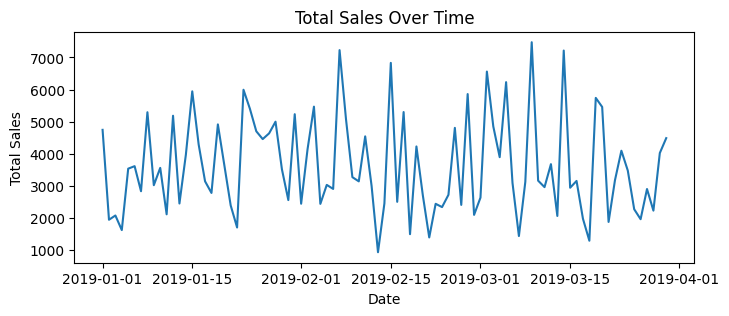

In [303]:
# Time Series Plots
df2['Date'] = pd.to_datetime(df2['Date'])
time_series_df = df2.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(8, 3))
plt.plot(time_series_df['Date'], time_series_df['Total'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



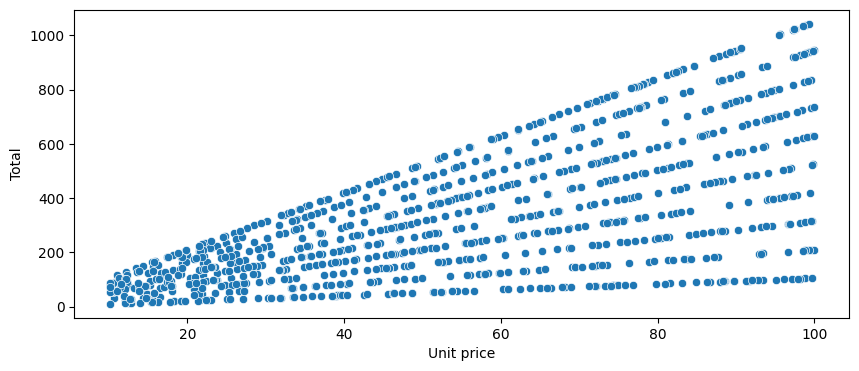

In [304]:
# Scatter Plots
plt.figure(figsize=(10, 4))
sns.scatterplot(x="Unit price", y="Total", data=df2)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



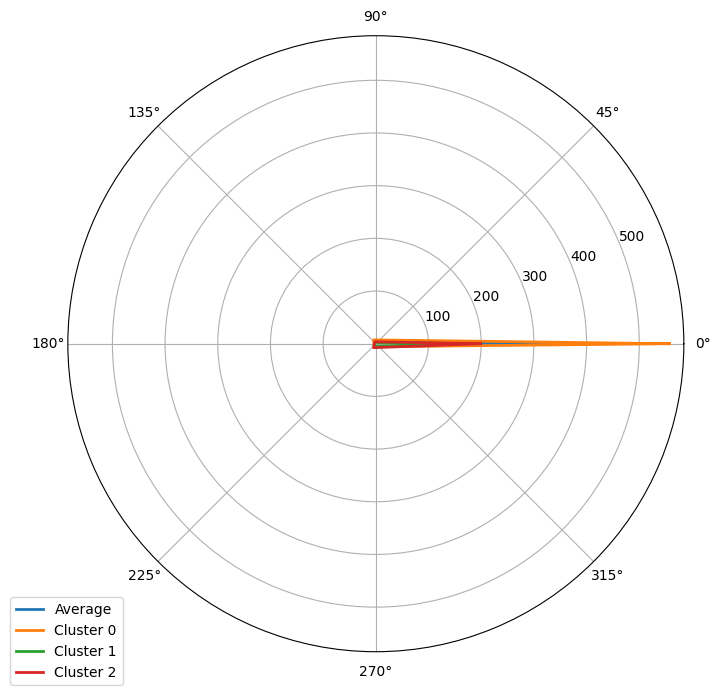

In [305]:
features = df2[['Total', 'Quantity', 'Rating']]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(features_standardized)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

categories = features.columns
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values = features.mean().tolist()
values += values[:1]
angles += angles[:1]

ax.plot(angles, values, linewidth=2, linestyle='solid', label='Average')
ax.fill(angles, values, alpha=0.4)

for cluster in range(3):  # Assuming 3 clusters
    values_cluster = features[df2['Cluster'] == cluster].mean().tolist()
    values_cluster += values_cluster[:1]
    ax.plot(angles, values_cluster, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values_cluster, alpha=0.4)

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

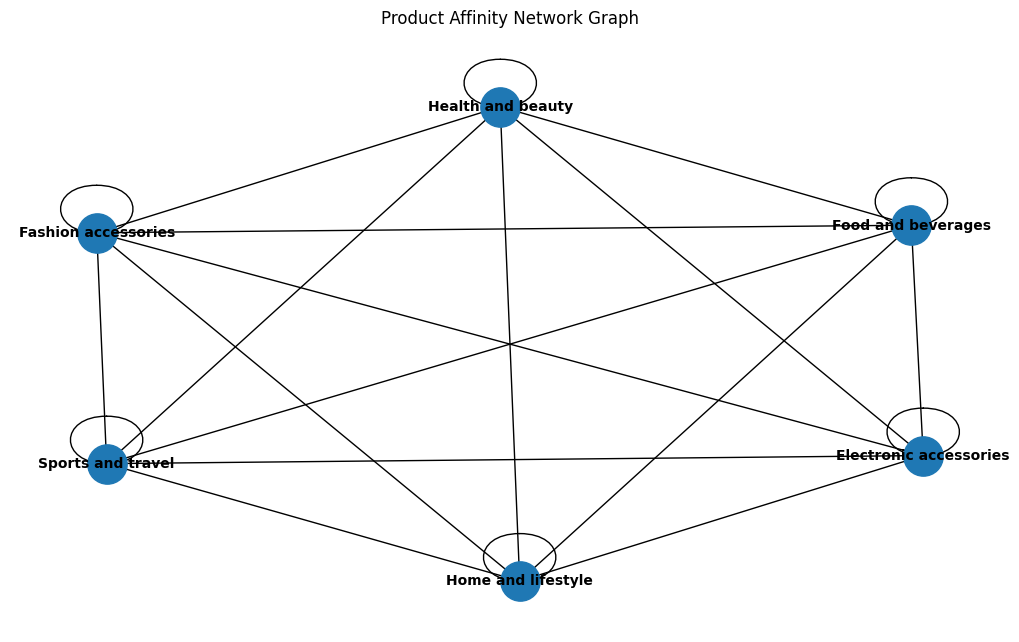

In [307]:
G = nx.Graph()
pairs = zip(df2['Product line'][:-1], df2['Product line'][1:])
G.add_edges_from(pairs)

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, font_size=10, node_size=800, font_color='black', font_weight='bold')
plt.title('Product Affinity Network Graph')
plt.show()

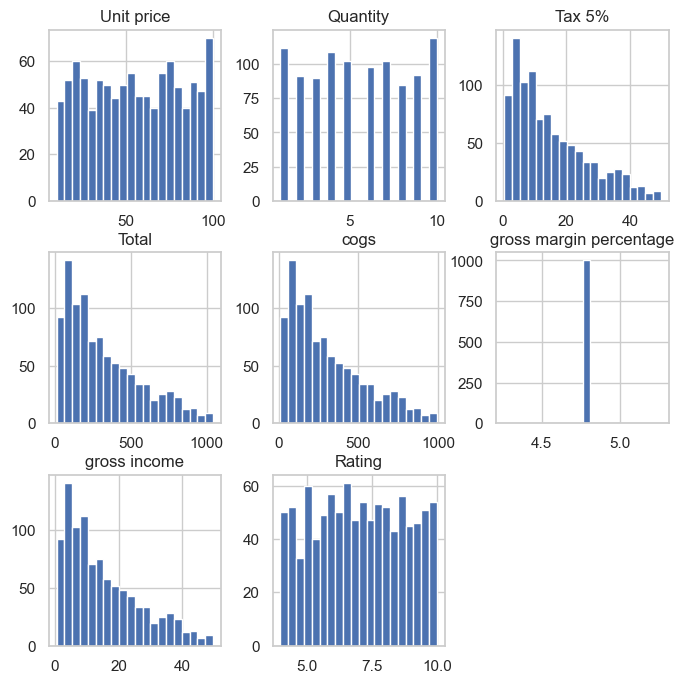

In [308]:
sns.set(style="whitegrid")
numerical_vars = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numerical_vars].hist(figsize=(8, 8), bins=20)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\

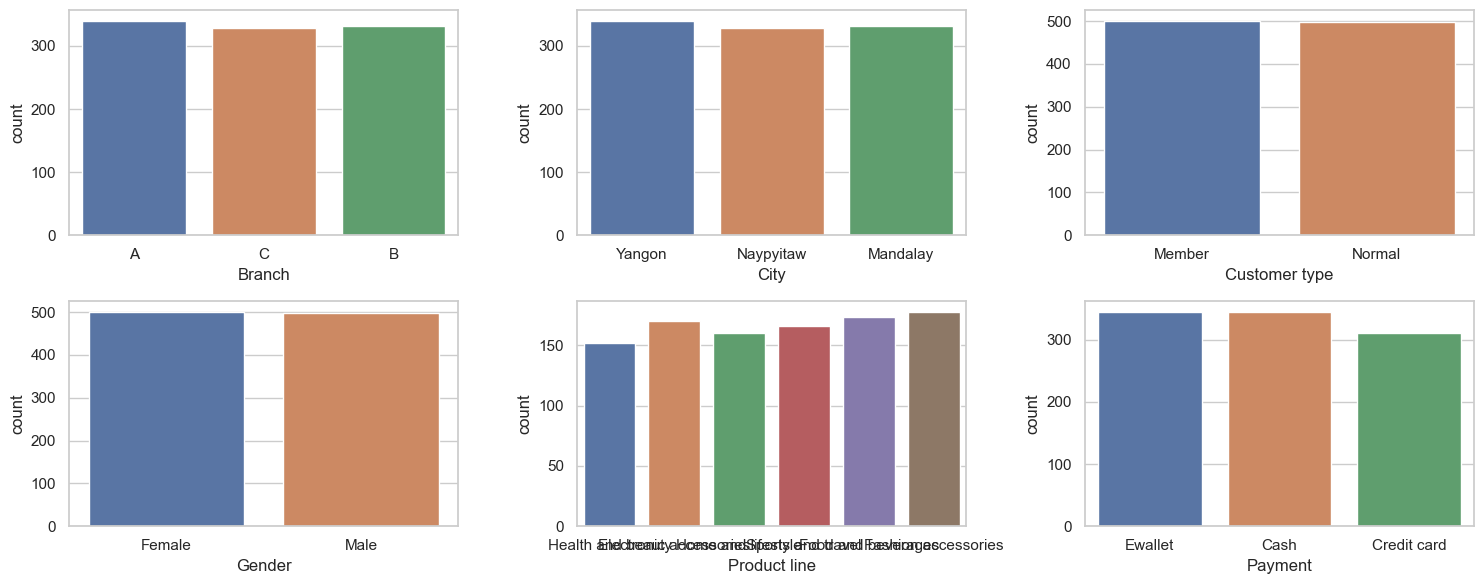

In [309]:
categorical_vars = df2.select_dtypes(include='object').columns
categorical_vars = categorical_vars.drop('Invoice ID')
categorical_vars = categorical_vars.drop('Time')
plt.figure(figsize=(15, 6))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, data=df2)

plt.tight_layout()
plt.show()

            3) ASSOCIATION RULE MINING

Preparing data to apply Apriori

In [310]:
apriori_df = apriori_df.drop(['gross margin percentage'], axis=1)
apriori_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8,10


In [311]:
exploded_list = apriori_df['Product line'].str.split(' and ').explode().tolist()
print(exploded_list)

['Health', 'beauty', 'Electronic accessories', 'Home', 'lifestyle', 'Health', 'beauty', 'Sports', 'travel', 'Electronic accessories', 'Electronic accessories', 'Home', 'lifestyle', 'Health', 'beauty', 'Food', 'beverages', 'Fashion accessories', 'Electronic accessories', 'Electronic accessories', 'Food', 'beverages', 'Health', 'beauty', 'Sports', 'travel', 'Health', 'beauty', 'Sports', 'travel', 'Food', 'beverages', 'Home', 'lifestyle', 'Electronic accessories', 'Health', 'beauty', 'Home', 'lifestyle', 'Electronic accessories', 'Sports', 'travel', 'Home', 'lifestyle', 'Fashion accessories', 'Fashion accessories', 'Food', 'beverages', 'Health', 'beauty', 'Fashion accessories', 'Sports', 'travel', 'Sports', 'travel', 'Health', 'beauty', 'Food', 'beverages', 'Sports', 'travel', 'Sports', 'travel', 'Electronic accessories', 'Health', 'beauty', 'Home', 'lifestyle', 'Home', 'lifestyle', 'Home', 'lifestyle', 'Sports', 'travel', 'Food', 'beverages', 'Health', 'beauty', 'Electronic accessories',

In [312]:
# Check item frequency
item_counts = Counter(apriori_df["Product line"])
print("\nItem Frequencies:")
for item, count in item_counts.items():
    print(f"{item}: {count}")


Item Frequencies:
Health and beauty: 152
Electronic accessories: 170
Home and lifestyle: 160
Sports and travel: 166
Food and beverages: 174
Fashion accessories: 178


In [313]:
apriori_df = pd.DataFrame(exploded_list, columns=['Product'])
apriori_df['Count'] = apriori_df.groupby('Product')['Product'].transform('count')
apriori_df = apriori_df.drop_duplicates().reset_index(drop=True)
apriori_df

,Product,Count
0,Health,152
1,beauty,152
2,Electronic accessories,170
3,Home,160
4,lifestyle,160
5,Sports,166
6,travel,166
7,Food,174
8,beverages,174
9,Fashion accessories,178


In [314]:
transactions_list = apriori_df.groupby('Count')['Product'].agg(list).reset_index(name='Transactions')['Transactions'].tolist()
transactions_list

[['Health', 'beauty'],
 ['Home', 'lifestyle'],
 ['Sports', 'travel'],
 ['Electronic accessories'],
 ['Food', 'beverages'],
 ['Fashion accessories']]

Using Transaction Encoder

In [315]:
tx = TransactionEncoder()
encoded_array = tx.fit(transactions_list).transform(transactions_list)
encoded_array

array([[False, False, False,  True, False, False,  True, False, False,
        False],
       [False, False, False, False,  True, False, False, False,  True,
        False],
       [False, False, False, False, False,  True, False, False, False,
         True],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False,  True, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False]])

In [316]:
encoded_df = pd.DataFrame(encoded_array, columns=tx.columns_, dtype=int)
encoded_df

,Electronic accessories,Fashion accessories,Food,Health,Home,Sports,beauty,beverages,lifestyle,travel
0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0


            Applying Apriori using MinSup 1%.

In [317]:
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.166667,(Electronic accessories)
1,0.166667,(Fashion accessories)
2,0.166667,(Food)
3,0.166667,(Health)
4,0.166667,(Home)
5,0.166667,(Sports)
6,0.166667,(beauty)
7,0.166667,(beverages)
8,0.166667,(lifestyle)
9,0.166667,(travel)


If we were to Apply Apriori directly:

In [318]:
dataset = ap_df.groupby("Invoice ID")["Product line"].apply(list).tolist()
te = TransactionEncoder()
onehot = te.fit_transform(dataset)
df_encoded = pd.DataFrame(onehot, columns=te.columns_)

frq_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

print("Frequent Itemsets:")
frq_itemsets

Frequent Itemsets:


,support,itemsets
0,0.170,(Electronic accessories)
1,0.178,(Fashion accessories)
2,0.174,(Food and beverages)
3,0.152,(Health and beauty)
4,0.160,(Home and lifestyle)
5,0.166,(Sports and travel)


            Forming Association Rules:

In [319]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beverages),(Food),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
1,(Food),(beverages),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
2,(Health),(beauty),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
3,(beauty),(Health),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
4,(Home),(lifestyle),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
5,(lifestyle),(Home),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
6,(travel),(Sports),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
7,(Sports),(travel),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0


            4) Comparative Analysis with FP Growth Algorithm

In [320]:
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets_fp

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.166667,(beauty)
1,0.166667,(Health)
2,0.166667,(lifestyle)
3,0.166667,(Home)
4,0.166667,(travel)
5,0.166667,(Sports)
6,0.166667,(Electronic accessories)
7,0.166667,(beverages)
8,0.166667,(Food)
9,0.166667,(Fashion accessories)


In [321]:
association_rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.1)
print("Association Rules (FP-Growth):")
association_rules_fp

Association Rules (FP-Growth):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Health),(beauty),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
1,(beauty),(Health),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
2,(Home),(lifestyle),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
3,(lifestyle),(Home),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
4,(travel),(Sports),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
5,(Sports),(travel),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
6,(beverages),(Food),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0
7,(Food),(beverages),0.166667,0.166667,0.166667,1.0,6.0,0.138889,inf,1.0


            Comparitive Analysis:

Apriori:

In [322]:
start_time_apriori = time.time()
frequent_itemsets_apriori = apriori(encoded_df, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.01)
end_time_apriori = time.time()
apriori1 = end_time_apriori - start_time_apriori
print(apriori1)

0.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [323]:
start_time_apriori = time.time()
frequent_itemsets_apriori = apriori(encoded_df, min_support=0.01, use_colnames=True)
end_time_apriori = time.time()
apriori2 = end_time_apriori - start_time_apriori
print(apriori2)

0.0040018558502197266


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [324]:
start_time_apriori = time.time()
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.01)
end_time_apriori = time.time()
apriori3 = end_time_apriori - start_time_apriori
print(apriori3)

0.002001523971557617


FP Growth:

In [325]:
start_time_fp = time.time()
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.1)
end_time_fp = time.time()
fp1 = end_time_fp - start_time_fp
print(fp1)

0.004002094268798828


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [326]:
start_time_fp = time.time()
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
end_time_fp = time.time()
fp2 = end_time_fp - start_time_fp
print(fp2)

0.002002239227294922


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [327]:
start_time_fp = time.time()
rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.1)
end_time_fp = time.time()
fp3 = end_time_fp - start_time_fp
print(fp3)

0.0019996166229248047


In [328]:
execution_times_df = pd.DataFrame(columns=['Algorithm', 'Total', 'Itemsets', 'Rules'])
apriori_df = pd.DataFrame({'Algorithm': ['Apriori'], 'Total': [apriori1], 'Itemsets': [apriori2], 'Rules': [apriori3]})
fp_growth_df = pd.DataFrame({'Algorithm': ['FP Growth'], 'Total': [fp1], 'Itemsets': [fp2], 'Rules': [fp3]})
execution_times_df = pd.concat([execution_times_df, apriori_df, fp_growth_df], ignore_index=True)
execution_times_df

C:\Users\hp\AppData\Local\Temp\ipykernel_2680\1205835119.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Algorithm,Total,Itemsets,Rules
0,Apriori,0.000000,0.004002,0.002002
1,FP Growth,0.004002,0.002002,0.002000


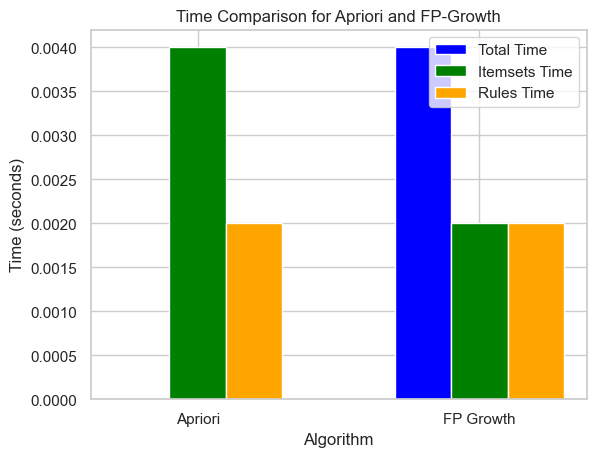

In [329]:
# Extract data from the DataFrame
algorithms = execution_times_df['Algorithm']
total_execution_times = execution_times_df['Total']
itemsets_times = execution_times_df['Itemsets']
rules_times = execution_times_df['Rules']

# Set up bar positions
bar_width = 0.2
index = np.arange(len(algorithms))

# Create grouped bar chart
plt.bar(index, total_execution_times, width=bar_width, label='Total Time', color='blue')
plt.bar(index + bar_width, itemsets_times, width=bar_width, label='Itemsets Time', color='green')
plt.bar(index + 2 * bar_width, rules_times, width=bar_width, label='Rules Time', color='orange')

# Set up labels and title
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison for Apriori and FP-Growth')
plt.xticks(index + bar_width, algorithms)
plt.legend()

# Show the plot
plt.show()


The following block of code does not run here, I used a .py script to execute it and get the requried info.

In [330]:
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Hour'] = df['Time'].dt.hour

    df = df.drop(['Invoice ID', 'Date', 'Year', 'Time'], axis=1)

    return df


def prepare_apriori_data(df):
    apriori_df = df.copy()
    apriori_df = apriori_df.drop(['gross margin percentage'], axis=1)
    exploded_list = apriori_df['Product line'].str.split(
        ' and ').explode().tolist()
    apriori_df = pd.DataFrame(exploded_list, columns=['Product'])
    apriori_df['Count'] = apriori_df.groupby(
        'Product')['Product'].transform('count')
    apriori_df = apriori_df.drop_duplicates().reset_index(drop=True)
    transactions_list = apriori_df.groupby('Count')['Product'].agg(
        list).reset_index(name='Transactions')['Transactions'].tolist()
    tx = TransactionEncoder()
    encoded_array = tx.fit(transactions_list).transform(transactions_list)
    encoded_df = pd.DataFrame(encoded_array, columns=tx.columns_, dtype=int)
    return encoded_df


@profile
def apriori_algorithm(encoded_df):
    start_mem_apriori = time.time()
    frequent_itemsets_apriori = apriori(
        encoded_df, min_support=0.01, use_colnames=True)
    rules_apriori = association_rules(
        frequent_itemsets_apriori, metric="confidence", min_threshold=0.01)
    end_mem_apriori = time.time()
    apriori1_mem = end_mem_apriori - start_mem_apriori
    print(apriori1_mem)


@profile
def fp_growth_algorithm(encoded_df):
    start_time_fp_mem = time.time()
    frequent_itemsets_fp = fpgrowth(
        encoded_df, min_support=0.01, use_colnames=True)
    rules_fp = association_rules(
        frequent_itemsets_fp, metric='confidence', min_threshold=0.1)
    end_time_fp_mem = time.time()
    fp1_mem = end_time_fp_mem - start_time_fp_mem
    print(fp1_mem)


if __name__ == "__main__":
    df = pd.read_csv(
        r"C:\Users\hp\Desktop\sem5\DM\proj\supermarket_sales - Sheet1.csv")
    df = preprocess_data(df)

    apriori_df = prepare_apriori_data(df)

    apriori_algorithm(apriori_df)
    fp_growth_algorithm(apriori_df)

ERROR: Could not find file C:\Users\hp\AppData\Local\Temp\ipykernel_2680\2387633636.py
0.024060487747192383
ERROR: Could not find file C:\Users\hp\AppData\Local\Temp\ipykernel_2680\2387633636.py
0.014003515243530273


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



            5) Tracking Patterns and Customer Behavior Analysis

In [331]:
df5.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Creating Time Series Data:

In [332]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Time'] = pd.to_datetime(df5['Time'], format='%H:%M')

df5['Year'] = df5['Date'].dt.year
df5['Month'] = df5['Date'].dt.month
df5['Day'] = df5['Date'].dt.day
df5['Hour'] = df5['Time'].dt.hour
df5['Minute'] = df5['Time'].dt.minute

df5 = df5.drop(['Date', 'Time', 'gross margin percentage'], axis=1)
df5.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Year,Month,Day,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019,1,5,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019,3,8,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019,3,3,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019,1,27,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019,2,8,10,37


In [333]:
df5['Timestamp'] = pd.to_datetime(df5[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df5.set_index('Timestamp')
df5.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Year,Month,Day,Hour,Minute,Timestamp
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019,1,5,13,8,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019,3,8,10,29,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019,3,3,13,23,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019,1,27,20,33,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019,2,8,10,37,2019-02-08 10:37:00


In [334]:
df5['Timestamp'].head()

0   2019-01-05 13:08:00
1   2019-03-08 10:29:00
2   2019-03-03 13:23:00
3   2019-01-27 20:33:00
4   2019-02-08 10:37:00
Name: Timestamp, dtype: datetime64[ns]

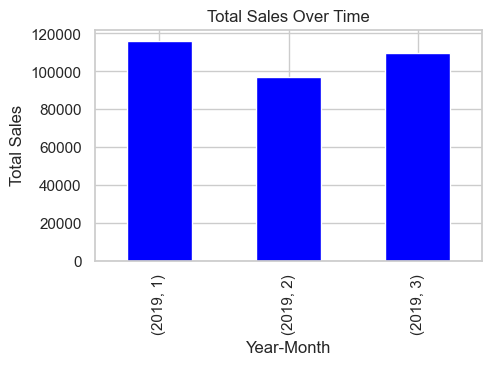

In [335]:
monthly_stats = df5.groupby(['Year', 'Month']).agg({'Quantity': 'mean', 'Total': 'sum', 'Rating': 'mean'})
plt.figure(figsize=(5, 3))
monthly_stats['Total'].plot(kind='bar', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

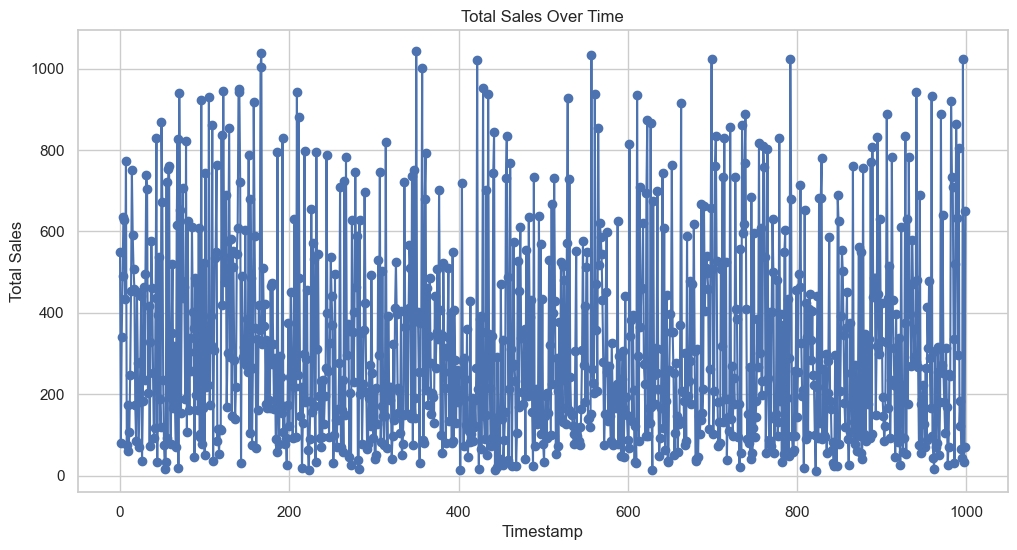

In [336]:
plt.figure(figsize=(12, 6))
plt.plot(df5.index, df5['Total'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Sales')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



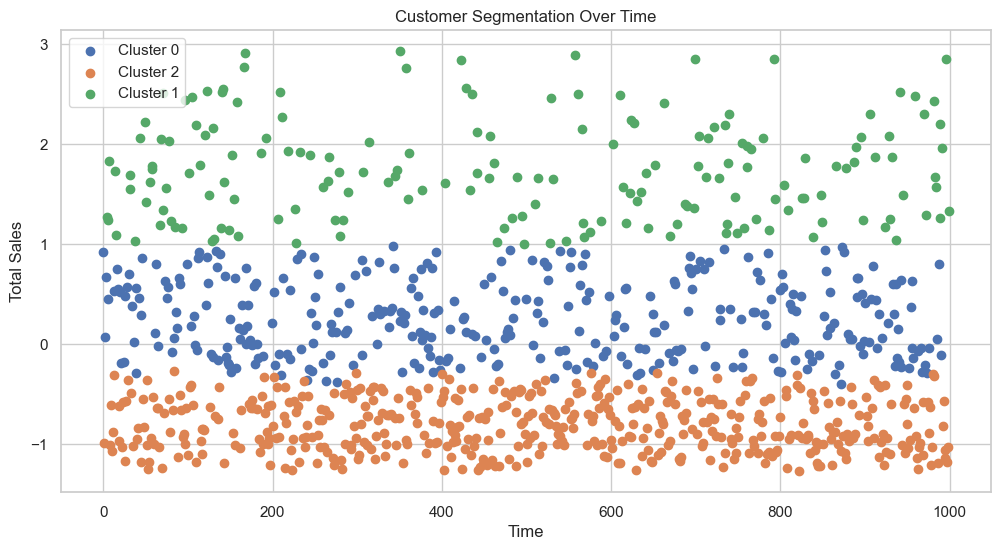

In [337]:
# e. Customer Segmentation Over Time:
# Standardize the numerical columns
scaler = StandardScaler()
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
df5[numerical_cols] = scaler.fit_transform(df5[numerical_cols])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df5[['PCA1', 'PCA2']] = pca.fit_transform(df5[numerical_cols])

# Cluster customers based on purchasing behavior
kmeans = KMeans(n_clusters=3, random_state=42)
df5['Cluster'] = kmeans.fit_predict(df5[['PCA1', 'PCA2']])

# Plot customer segmentation over time
plt.figure(figsize=(12, 6))
for cluster in df5['Cluster'].unique():
    plt.scatter(df5[df5['Cluster'] == cluster].index, df5[df5['Cluster'] == cluster]['Total'], label=f'Cluster {cluster}')

plt.title('Customer Segmentation Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

<Figure size 1500x300 with 0 Axes>

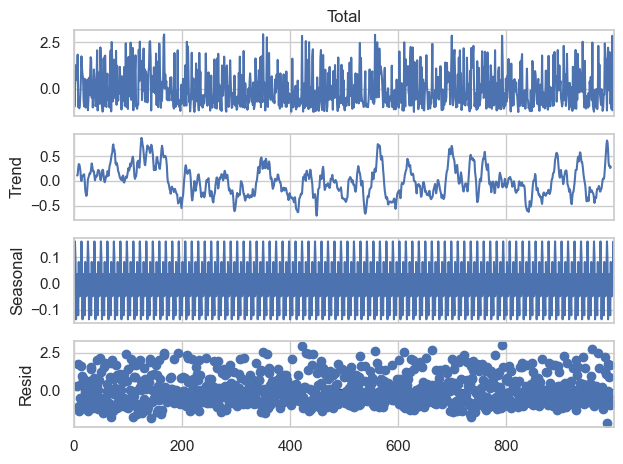

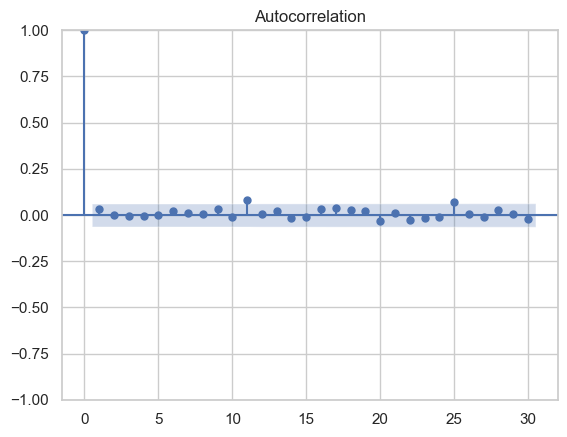

In [338]:
# Seasonal Decomposition
sns.set(style="whitegrid")
result = seasonal_decompose(df5['Total'], model='additive', period=12)
plt.figure(figsize=(15, 3))
result.plot()
plt.show()

# Autocorrelation
plot_acf(df5['Total'])
plt.show()


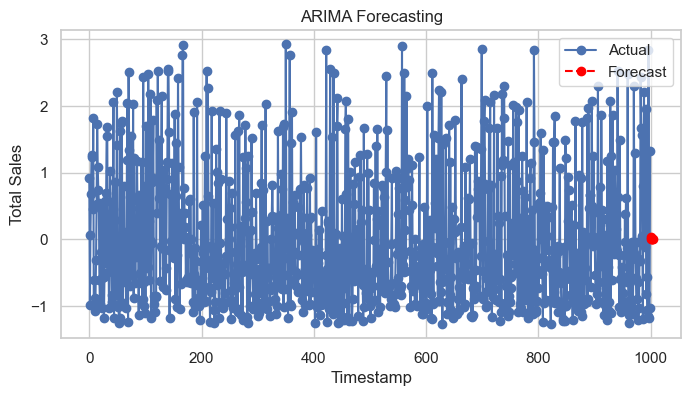

In [339]:
# Fit ARIMA model
model = ARIMA(df5['Total'], order=(1, 1, 1))
result = model.fit()

# Generate forecast for the next 5 time points
forecast_steps = 5
forecast = result.get_forecast(steps=forecast_steps).predicted_mean

# Visualize the results
plt.figure(figsize=(8, 4))
plt.plot(df5.index, df5['Total'], label='Actual', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='dashed', color='red', marker='o')
plt.title('ARIMA Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [340]:
df5.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,Year,Month,Day,Hour,Minute,Timestamp,PCA1,PCA2,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,...,1.238443,2019,1,5,13,8,2019-01-05 13:08:00,2.006368,1.264095,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,...,1.529527,2019,3,8,10,29,2019-03-08 10:29:00,-2.307283,1.043281,2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,...,0.248760,2019,3,3,13,23,2019-03-03 13:23:00,0.186452,0.030685,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,...,0.830927,2019,1,27,20,33,2019-01-27 20:33:00,1.504910,0.636161,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,...,-0.973790,2019,2,8,10,37,2019-02-08 10:37:00,2.800943,-0.688006,1


Feature Engineering to calculate and visualize Rolling Mean: calculation of the mean over a specified window size for the 'Total' sales column.

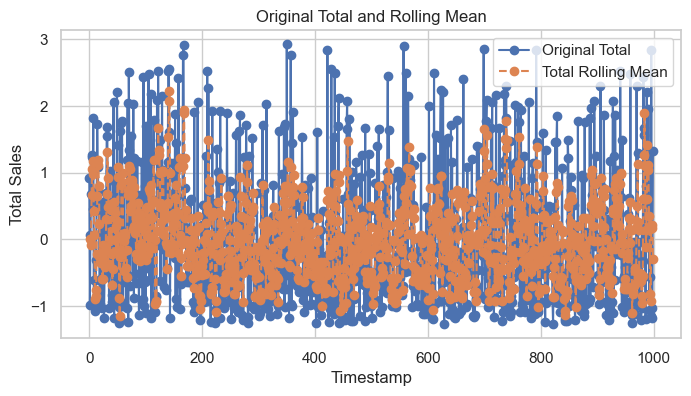

In [341]:
# Rolling Statistics
df5['Total_Rolling_Mean'] = df5['Total'].rolling(window=3).mean()

plt.figure(figsize=(8, 4))
plt.plot(df5.index, df5['Total'], label='Original Total', marker='o')
plt.plot(df5.index, df5['Total_Rolling_Mean'], label='Total Rolling Mean', linestyle='dashed', marker='o')
plt.title('Original Total and Rolling Mean')
plt.xlabel('Timestamp')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

            6) SEQUENTIAL PATTERN MINING

In [389]:
transactions_list

[['Health', 'beauty'],
 ['Home', 'lifestyle'],
 ['Sports', 'travel'],
 ['Electronic accessories'],
 ['Food', 'beverages'],
 ['Fashion accessories']]

            Prefix Span

In [396]:
patterns = PrefixSpan(transactions_list).frequent(0.1, closed=True)

for pattern in patterns:
    print(pattern)

(1, ['Health', 'beauty'])
(1, ['Home', 'lifestyle'])
(1, ['Sports', 'travel'])
(1, ['Electronic accessories'])
(1, ['Food', 'beverages'])
(1, ['Fashion accessories'])


            GSP: Generalized Sequential Patterns

In [398]:
freq_seqs = seqmining.freq_seq_enum(transactions_list, 0.1)
for seq in freq_seqs:
    print(seq)

(('Food',), 1)
(('Health',), 1)
(('travel',), 1)
(('Fashion accessories',), 1)
(('Health', 'beauty'), 1)
(('Food', 'beverages'), 1)
(('Home',), 1)
(('lifestyle',), 1)
(('Electronic accessories',), 1)
(('beverages',), 1)
(('Sports',), 1)
(('Sports', 'travel'), 1)
(('beauty',), 1)
(('Home', 'lifestyle'), 1)


            Eclat Algorithm

In [404]:
# Assuming transactions_list is a list of lists
df_transactions = pd.DataFrame(transactions_list)

eclat_instance = ECLAT(df_transactions, verbose=True)
frequent_itemsets = eclat_instance.fit(min_support=0.1)
for itemset in frequent_itemsets:
    print(itemset)

100%|██████████| 11/11 [00:00<?, ?it/s]


Combination 1 by 1


10it [00:00, 320.33it/s]


Combination 2 by 2


45it [00:00, 395.90it/s]


Combination 3 by 3


120it [00:00, 523.69it/s]

{'beverages': [4], 'Food': [4], 'Sports': [2], 'lifestyle': [1], 'Home': [1], 'Electronic accessories': [3], 'beauty': [0], 'Fashion accessories': [5], 'travel': [2], 'Health': [0], 'beverages & Food': [4], 'Sports & travel': [2], 'lifestyle & Home': [1], 'beauty & Health': [0]}
{'beverages': 0.16666666666666666, 'Food': 0.16666666666666666, 'Sports': 0.16666666666666666, 'lifestyle': 0.16666666666666666, 'Home': 0.16666666666666666, 'Electronic accessories': 0.16666666666666666, 'beauty': 0.16666666666666666, 'Fashion accessories': 0.16666666666666666, 'travel': 0.16666666666666666, 'Health': 0.16666666666666666, 'beverages & Food': 0.16666666666666666, 'Sports & travel': 0.16666666666666666, 'lifestyle & Home': 0.16666666666666666, 'beauty & Health': 0.16666666666666666}


            7) CLUSTERING       

In [126]:
clustering_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [127]:
# Assuming clustering_df is your DataFrame
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Select relevant features for clustering
data_for_clustering = clustering_df[features]

            K-Means

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=3)
clustering_df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

inertia = kmeans.inertia_
print("Inertia (K-Means):", inertia)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)
ch_index = calinski_harabasz_score(scaled_features, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia (K-Means): 2702.603177131712
Silhouette Score: 0.304650899900705
Davies-Bouldin Index: 1.178698066615375
Calinski-Harabasz Index: 792.6781519461717


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: 

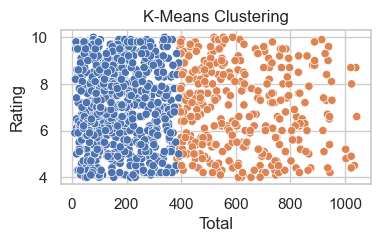

In [153]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Total', y='Rating', hue=kmeans_labels, data=df, legend=False)
plt.title('K-Means Clustering')
plt.show()

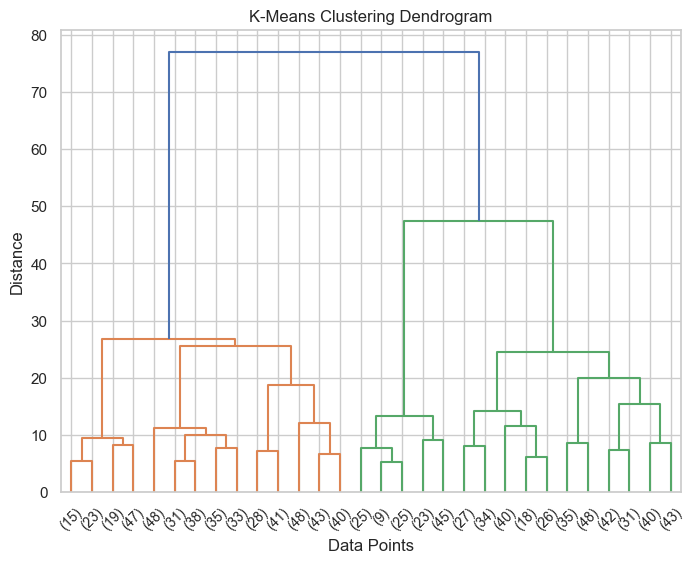

In [131]:
linkage_matrix = linkage(scaled_features, method='ward')

plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('K-Means Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

            Agglomerative

In [56]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

agg_clustering = AgglomerativeClustering(n_clusters=3)
clustering_df['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_features)

ari_score = adjusted_rand_score(clustering_df['KMeans_Cluster'], clustering_df['Agglomerative_Cluster'])
print("Adjusted Rand Index (ARI):", ari_score)
mi_score = normalized_mutual_info_score(clustering_df['KMeans_Cluster'], clustering_df['Agglomerative_Cluster'])
print("Normalized Mutual Information (NMI):", mi_score)

Adjusted Rand Index (ARI): 0.5450579035311303
Normalized Mutual Information (NMI): 0.5858539281384306


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categori

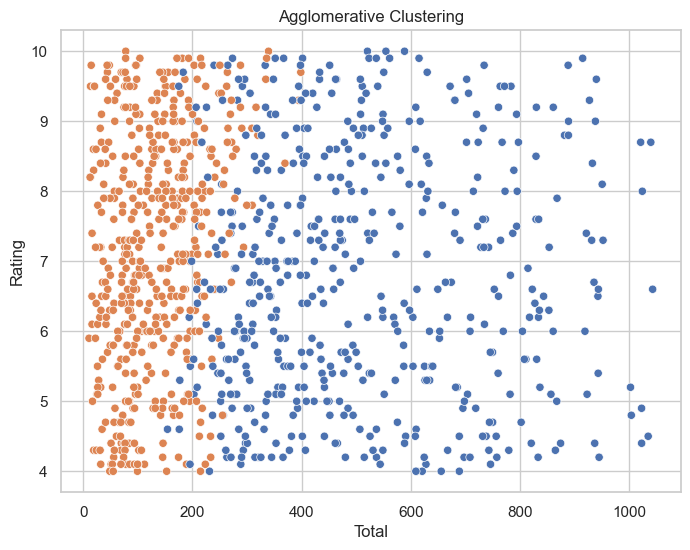

In [168]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
clustering_df['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Total', y='Rating', hue='Agglomerative_Cluster', data=clustering_df, legend=False)
plt.title('Agglomerative Clustering')
plt.show()

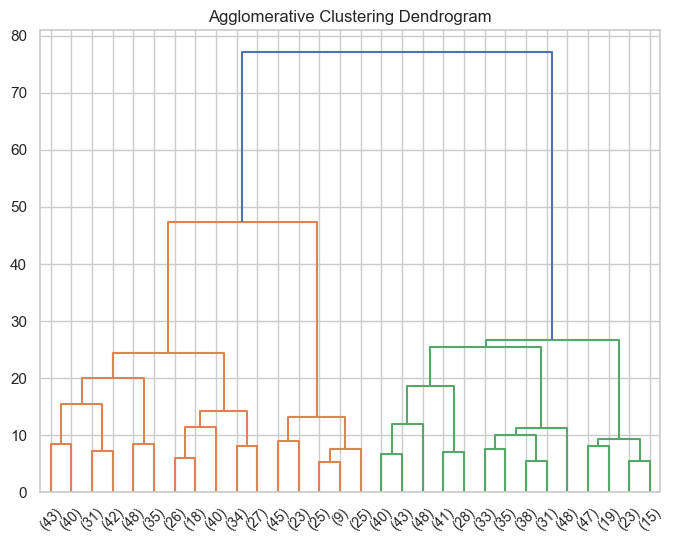

In [169]:
# Create linkage matrix
linkage_matrix = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, orientation='top', labels=clustering_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.show()

            K-Median

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


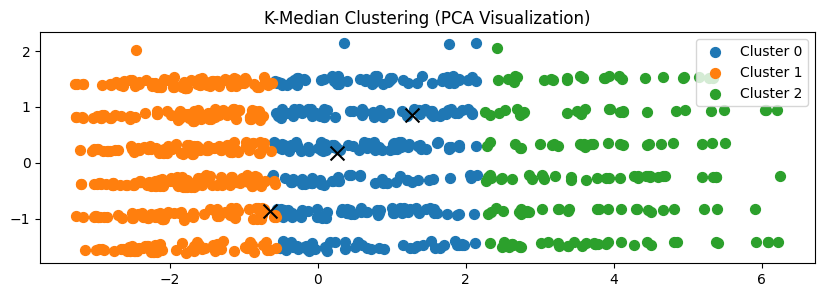

In [48]:
# Assuming scaled_features is your standardized data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Perform K-Median clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_features)

# Find medians of each cluster
medians_idx = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_features)[0]
medians = scaled_features[medians_idx]

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 3))

for cluster_id, median_point in enumerate(medians):
    cluster_points = reduced_features[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

    # Plot median as an 'X'
    plt.scatter(median_point[0], median_point[1], marker='x', s=100, c='black')

plt.title('K-Median Clustering (PCA Visualization)')
plt.legend()
plt.show()


            DBSCAN

In [142]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clustering_df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Silhouette Score (not typically used for DBSCAN but included for comparison)
silhouette_avg = silhouette_score(scaled_features, clustering_df['DBSCAN_Cluster'])
print("Silhouette Score (DBSCAN):", silhouette_avg)

# Davies-Bouldin Index (not typically used for DBSCAN but included for comparison)
db_index = davies_bouldin_score(scaled_features, clustering_df['DBSCAN_Cluster'])
print("Davies-Bouldin Index (DBSCAN):", db_index)

# Number of clusters found by DBSCAN
num_clusters_dbscan = len(set(clustering_df['DBSCAN_Cluster'])) - (1 if -1 in clustering_df['DBSCAN_Cluster'] else 0)
print("Number of Clusters (DBSCAN):", num_clusters_dbscan)

Silhouette Score (DBSCAN): -0.12528450383737091
Davies-Bouldin Index (DBSCAN): 1.5543217530912334
Number of Clusters (DBSCAN): 23


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


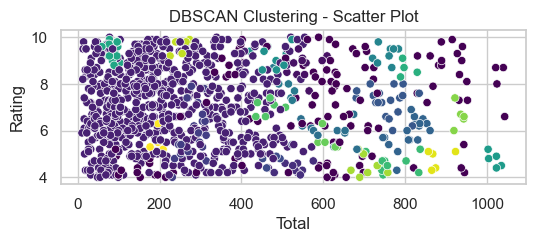

In [173]:
x_feature = 'Total'
y_feature = 'Rating'

# Scatter plot with DBSCAN cluster coloring
plt.figure(figsize=(6, 2))
sns.scatterplot(x=x_feature, y=y_feature, hue='DBSCAN_Cluster', data=clustering_df, palette='viridis', legend=False)
plt.title('DBSCAN Clustering - Scatter Plot')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

            Mean Shift

In [144]:
mean_shift = MeanShift()
clustering_df['MeanShift_Cluster'] = mean_shift.fit_predict(scaled_features)
num_clusters_mean_shift = len(set(clustering_df['MeanShift_Cluster']))
print("Number of Clusters (Mean Shift):", num_clusters_mean_shift)

Number of Clusters (Mean Shift): 1


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categori

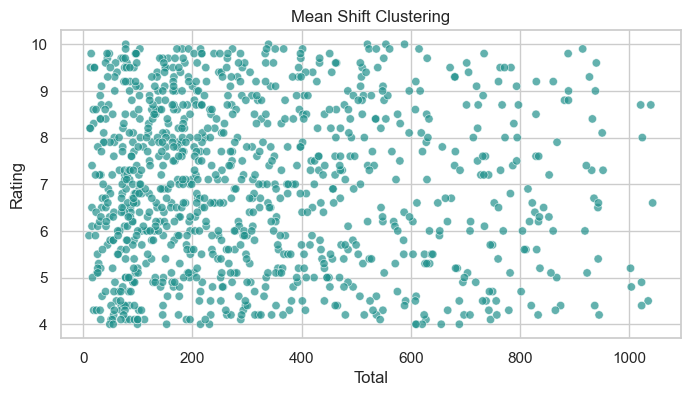

In [177]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Total', y='Rating', hue='MeanShift_Cluster', data=clustering_df, palette='viridis', alpha=0.7, legend=False)
plt.title('Mean Shift Clustering')
plt.show()

            8) CLASSIFICATION

I decided to choose the column 'Total' as the target variable.

In [79]:
df_classif.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,-0.998002,0.711694,0.509930,0.951427,548,0.918142,0.951427,1.463146,-1.189455,-1.180314,...,-0.698638,1.393261,-0.998002,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.671847,1.377879
1,1.002002,-1.517427,-0.174540,-1.013096,80,-0.987284,-1.013096,1.463146,1.206225,-0.835058,...,1.431356,-0.717741,-0.998002,-0.465344,-0.45897,-0.423374,-0.436436,-0.44614,-0.671847,-0.725753
2,1.002002,-0.346194,0.509930,0.097287,340,0.072235,0.097287,0.276972,1.206225,-1.410484,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,1.488433,-0.725753
3,-0.998002,0.107187,0.852165,0.695185,489,0.674624,0.695185,0.870059,-1.189455,1.351560,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.671847,1.377879
4,1.002002,1.165074,0.509930,1.293083,634,1.268467,1.293083,-0.909202,0.008385,-0.835058,...,-0.698638,1.393261,1.002002,-0.465344,-0.45897,-0.423374,-0.436436,2.24145,-0.671847,1.377879


                    8.1) Binning

In [359]:
# Square Root Rule:

num_bins1 = int(np.sqrt(len(df_classif)))
num_bins1

31

In [360]:
# Sturges' Formula:

num_bins2 = int(np.ceil(1 + np.log2(len(df_classif))))
num_bins2

11

In [361]:
# Scott's Rule:

bin_width = 3.5 * df_classif['Total'].std() / len(df_classif['Total'])**(1/3)
num_bins3 = int((df_classif['Total'].max() - df_classif['Total'].min()) / bin_width)
num_bins3

11

In [362]:
# Freedman-Diaconis Rule:

df_c = df_classif.copy()
df_c['Total'] = pd.to_numeric(df_c['Total'], errors='coerce')
iqr = np.percentile(df_c['Total'], 75) - np.percentile(df_c['Total'], 25)
bin_width = 2 * iqr / len(df_c['Total'])**(1/3)
num_bins4 = int((df_c['Total'].max() - df_c['Total'].min()) / bin_width)
num_bins4

14

In [363]:
# Doane's Formula:

from scipy.stats import skew
num_bins5 = int(1 + np.log2(len(df_classif['Total'])) + np.log2(1 + abs(skew(df_classif['Total']) / (6/np.sqrt(len(df_classif['Total']))))))
num_bins5

13

In [364]:
bins_data = {
    'Method': ['Square Root Rule', 'Sturges\' Formula', 'Scott\'s Rule', 'Freedman-Diaconis Rule', 'Doane\'s Formula'],
    'Number of Bins': [num_bins1, num_bins2, num_bins3, num_bins4, num_bins5]
}

bins_df = pd.DataFrame(bins_data)
bins_df

,Method,Number of Bins
0,Square Root Rule,31
1,Sturges' Formula,11
2,Scott's Rule,11
3,Freedman-Diaconis Rule,14
4,Doane's Formula,13


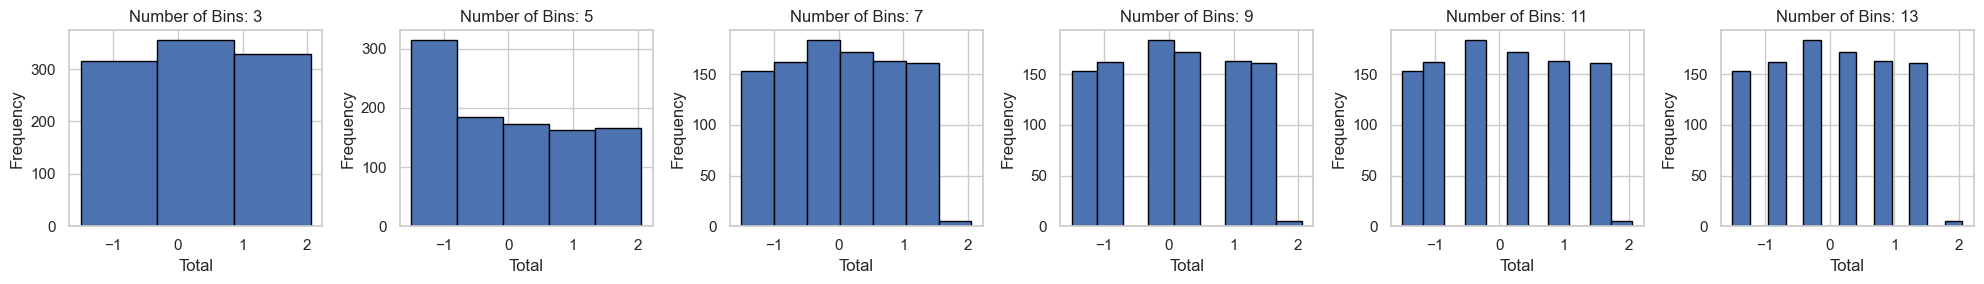

In [365]:
selected_num_bins = [3, 5, 7, 9, 11, 13]

plt.figure(figsize=(20, 3))

for i, num_bins in enumerate(selected_num_bins, start=1):
    plt.subplot(1, len(selected_num_bins), i)
    plt.hist(df_classif['Rating'], bins=num_bins, edgecolor='black')
    plt.title(f'Number of Bins: {num_bins}')
    plt.xlabel('Total')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [366]:
column_name = 'Total'
value_counts = df_classif[column_name].value_counts()
variance = df_classif[column_name].var()

print(f"Distinct values and their frequencies in {column_name}:\n{value_counts}\n")
print(f"Variance of {column_name}: {variance}")

Distinct values and their frequencies in Total:
Total
125    6
175    6
145    6
69     6
77     6
      ..
721    1
149    1
395    1
410    1
649    1
Name: count, Length: 546, dtype: int64

Variance of Total: 60457.81084984985


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


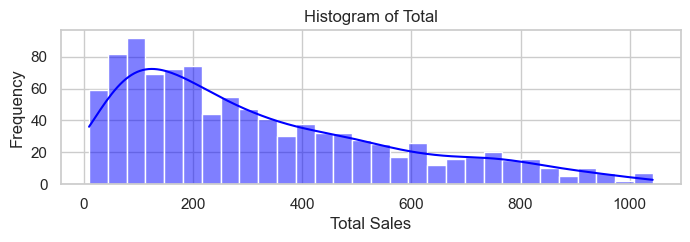

In [86]:
# Assuming df_classif is your DataFrame
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(8, 2))
sns.histplot(df_classif['Total'], kde=True, bins=30, color='blue')
plt.title('Histogram of Total')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

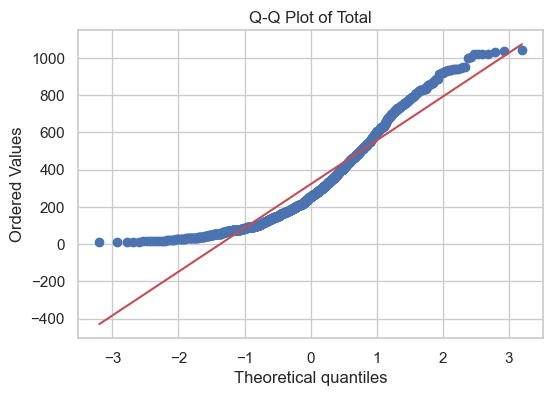

In [84]:
# Q-Q plot
plt.figure(figsize=(6, 4))
probplot(df_classif['Total'], plot=plt)
plt.title('Q-Q Plot of Total')
plt.show()

In [87]:
column_name = 'Total'
percentile_33 = df_classif[column_name].quantile(0.33)
percentile_66 = df_classif[column_name].quantile(0.66)

# Define bin edges
bin_edges = [df_classif[column_name].min(), percentile_33, percentile_66, df_classif[column_name].max()]
print("Bin Edges:")
print(bin_edges)

Bin Edges:
[10, 163.0, 381.68000000000006, 1042]


In [88]:
# Assuming df_classif is your DataFrame and 'Total' is the name of the column
column_name = 'Total'

# Calculate bin edges based on percentiles
percentile_33 = df_classif[column_name].quantile(0.33)
percentile_66 = df_classif[column_name].quantile(0.66)

# Define bin edges
bin_edges = [df_classif[column_name].min(), percentile_33, percentile_66, df_classif[column_name].max()]

# Define bin labels (optional)
bin_labels = ['Low', 'Medium', 'High']

# Apply binning using cut
df_classif['Total_bins'] = pd.cut(df_classif[column_name], bins=bin_edges, labels=bin_labels, include_lowest=True)
df_classif['Total'] = df_classif['Total_bins']
df_classif.drop('Total_bins', axis=1, inplace=True)
df_classif['Total']


0        High
1         Low
2      Medium
3        High
4        High
        ...  
995       Low
996      High
997       Low
998       Low
999      High
Name: Total, Length: 1000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


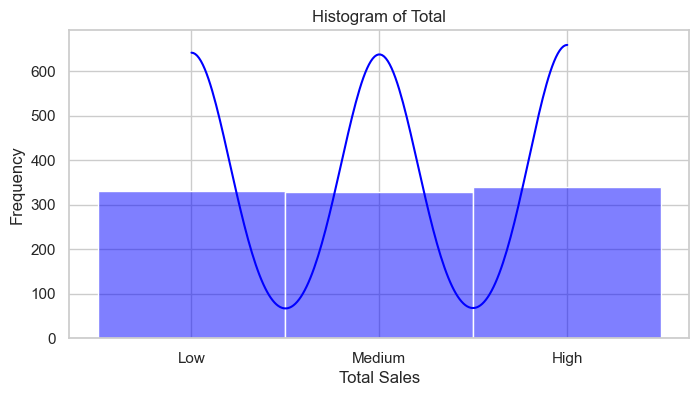

In [90]:
# Assuming df_classif is your DataFrame
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_classif['Total'], kde=True, bins=30, color='blue')
plt.title('Histogram of Total')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

In [372]:
# Assuming 'Total' is the target column
new_rating_counts = df_classif['Total'].value_counts().sort_index()

# Display the counts for each discrete value
new_rating_counts

Total
Low       331
Medium    329
High      340
Name: count, dtype: int64

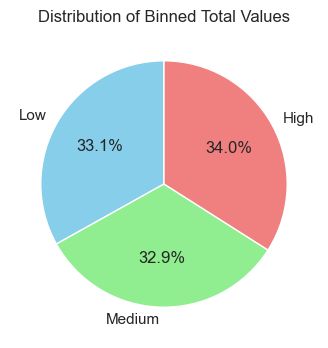

In [373]:
new_rating_counts = df_classif['Total'].value_counts().sort_index()

plt.figure(figsize=(4,4))
plt.pie(new_rating_counts, labels=new_rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Binned Total Values')
plt.show()

In [104]:
df_anova = df_classif.copy()

                    8.2) Splitting into Training and Testing Sets

In [374]:
Xc = df_classif.drop('Total', axis=1)
yc = df_classif['Total']
classif_X_train, classif_X_test, classif_y_train, classif_y_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

print("Training set shape:", classif_X_train.shape, classif_y_train.shape)
print("Testing set shape:", classif_X_test.shape, classif_y_test.shape)

Training set shape: (800, 22) (800,)
Testing set shape: (200, 22) (200,)


                    8.3) Model Training and Testing

In [375]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

evaluation_results = []

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(classif_X_train)
X_test_pca = pca.transform(classif_X_test)

for model_name, classifier in classifiers.items():
    classifier.fit(X_train_pca, classif_y_train)
    classif_y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(classif_y_test, classif_y_pred)
    precision = precision_score(classif_y_test, classif_y_pred, average='weighted')
    recall = recall_score(classif_y_test, classif_y_pred, average='weighted')
    f1 = f1_score(classif_y_test, classif_y_pred, average='weighted')

    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.940,0.942260,0.940,0.940410
1,Gradient Boosting,0.925,0.927232,0.925,0.925458
2,Logistic Regression,0.940,0.940435,0.940,0.939632
3,Naive Bayes,0.920,0.921063,0.920,0.920297
4,K-Nearest Neighbors,0.810,0.816504,0.810,0.812382
5,Support Vector Machine,0.915,0.914824,0.915,0.914877


            9) REGRESSION

In [94]:
# Applying PCA with 15 components:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Adjusted R2', 'Explained Variance'])

# Function to calculate adjusted R-squared:
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

# List of regression models to apply:
models = [LinearRegression(), Ridge(), ElasticNet(), RandomForestRegressor(), DecisionTreeRegressor()]

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Adjusted R2', 'Explained Variance'])

# Loop through each model
for model in models:
    # Train the model
    model.fit(X_train_pca, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_pca)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), X_test_pca.shape[1])
    ev = explained_variance_score(y_test, y_pred)

    # Create a DataFrame with the results for the current model
    model_results = pd.DataFrame({
        'Model': [model.__class__.__name__],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'R2': [r2],
        'Adjusted R2': [adj_r2],
        'Explained Variance': [ev]
    })

    # Concatenate the current model's results to the overall results DataFrame
    results_df = pd.concat([results_df, model_results], ignore_index=True)

# Display the results
results_df

C:\Users\hp\AppData\Local\Temp\ipykernel_15100\515686258.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, model_results], ignore_index=True)


,Model,MSE,RMSE,MAE,R2,Adjusted R2,Explained Variance
0,LinearRegression,405.263702,20.131162,14.938315,0.993771,0.993263,0.993788
1,Ridge,405.359727,20.133547,14.947561,0.993769,0.993262,0.993787
2,ElasticNet,1366.993951,36.972881,27.411452,0.978989,0.977276,0.979146
3,RandomForestRegressor,302.036030,17.379184,13.506950,0.995358,0.994979,0.995358
4,DecisionTreeRegressor,637.420000,25.247178,19.150000,0.990203,0.989404,0.990238


            10) Outlier Detection & Statistical Validation

I'm going to use encoded data, so that I'm able to apply the methods to all columns (since they are now numeric).

In [95]:
outlier_df.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0,74,7,26,548,522,26,9,0,4,...,0,1,0,0,0,1,0,0,0,1
1,1,15,5,3,80,76,3,9,2,7,...,1,0,0,0,0,0,0,0,0,0
2,1,46,7,16,340,324,16,7,2,2,...,0,1,1,0,0,0,1,0,1,0
3,0,58,8,23,489,465,23,8,0,26,...,0,1,1,0,0,1,0,0,0,1
4,1,86,7,30,634,604,30,5,1,7,...,0,1,1,0,0,0,0,1,0,1


In [96]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Customer type                     1000 non-null   int32
 1   Unit price                        1000 non-null   int32
 2   Quantity                          1000 non-null   int32
 3   Tax 5%                            1000 non-null   int32
 4   Total                             1000 non-null   int32
 5   cogs                              1000 non-null   int32
 6   gross income                      1000 non-null   int32
 7   Rating                            1000 non-null   int32
 8   Month                             1000 non-null   int32
 9   Day                               1000 non-null   int32
 10  Hour                              1000 non-null   int32
 11  Branch_B                          1000 non-null   int32
 12  Branch_C                          1

In [97]:
distinct_counts = outlier_df.nunique()
print('DISTINCT COUNT:')
distinct_counts

DISTINCT COUNT:


Customer type                         2
Unit price                           90
Quantity                             10
Tax 5%                               49
Total                               546
cogs                                527
gross income                         49
Rating                                7
Month                                 3
Day                                  31
Hour                                 11
Branch_B                              2
Branch_C                              2
City_Naypyitaw                        2
City_Yangon                           2
Gender_Male                           2
Product line_Fashion accessories      2
Product line_Food and beverages       2
Product line_Health and beauty        2
Product line_Home and lifestyle       2
Product line_Sports and travel        2
Payment_Credit card                   2
Payment_Ewallet                       2
dtype: int64

Analyzing the 'Total' column for Outliers:

In [98]:
columns_of_interest = [
    'Total', 'Customer type', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
    'cogs', 'gross income', 'Rating', 'Month', 'Day', 'Hour'
]

outlier_counts_df = pd.DataFrame(columns=['Threshold'] + columns_of_interest)

def detect_outliers(data, threshold):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return len(outliers)

threshold_values = np.arange(1, 4, 0.5)  # Varying threshold from 1 to 3 in steps of 0.5

dfs_to_concat = []

for threshold in threshold_values:
    outlier_counts = [threshold]
    
    for column in columns_of_interest:
        count_outliers = detect_outliers(outlier_df[column], threshold)
        outlier_counts.append(count_outliers)

    df_temp = pd.DataFrame([outlier_counts], columns=outlier_counts_df.columns)
    dfs_to_concat.append(df_temp)

outlier_counts_df = pd.concat(dfs_to_concat, ignore_index=True)

print('Outlier Counts for Different Thresholds:')
outlier_counts_df

Outlier Counts for Different Thresholds:


,Threshold,Total,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,Hour
0,1.0,308,499,426,414,331,308,311,331,319,697,443,379
1,1.5,112,0,139,231,112,112,112,112,158,0,122,176
2,2.0,54,0,0,0,52,54,53,52,5,0,0,0
3,2.5,17,0,0,0,11,17,17,11,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.5,0,0,0,0,0,0,0,0,0,0,0,0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


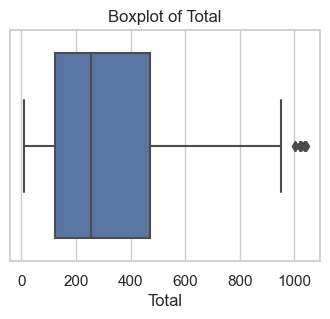

Rows with Total outliers:


,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
70,1,89,10,44,939,894,44,9,0,5,...,1,0,1,0,1,0,0,0,1,0
122,0,99,9,44,944,899,44,4,2,8,...,0,0,1,0,0,0,0,1,1,0
140,0,89,10,44,942,898,44,5,0,22,...,1,0,0,0,0,0,0,1,1,0
141,0,90,10,45,950,905,45,8,0,24,...,1,0,1,0,0,1,0,0,0,0
166,1,95,10,47,1003,955,47,4,0,15,...,1,0,1,0,0,0,1,0,0,0
167,1,98,10,49,1039,989,49,8,1,7,...,0,1,1,1,0,0,0,0,1,0
209,1,99,9,44,942,897,44,6,2,1,...,0,0,0,0,0,0,0,0,1,0
350,0,99,10,49,1042,993,49,6,1,14,...,1,0,0,1,0,0,0,0,1,0
357,1,95,10,47,1002,954,47,5,0,8,...,1,0,0,0,0,0,0,1,0,0
422,0,97,10,48,1020,972,48,8,1,7,...,1,0,0,1,0,0,0,0,1,0


In [101]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=outlier_df['Total'])
plt.title('Boxplot of Total')
plt.show()

z_scores_rating = zscore(outlier_df['Total'])
threshold = 2.5
rating_outlier_indices = (z_scores_rating > threshold) | (z_scores_rating < -threshold)
print('Rows with Total outliers:')
outlier_df[rating_outlier_indices]

In [107]:
# Change the name of 'Total' column in df_anova to 'Total_Category'
df_anova.rename(columns={'Total': 'Total_Category'}, inplace=True)

# Copy 'Total' column from outlier_df to df_anova
df_anova['Total_Category'] = outlier_df['Total']

# Now you can use df_anova in the previous ANOVA code
from scipy.stats import f_oneway

# Assuming 'df_anova' is your dataset
total_high = df_anova[df_anova['Total_Category'] == 'High']['Total_Category']
total_medium = df_anova[df_anova['Total_Category'] == 'Medium']['Total_Category']
total_low = df_anova[df_anova['Total_Category'] == 'Low']['Total_Category']

# Perform ANOVA test
f_stat, p_value = f_oneway(total_high, total_medium, total_low)

# Print the results
print(f'F-statistic: {f_stat}\nP-value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference in Total sales among High, Medium, and Low categories is statistically significant.")
else:
    print("There is no statistically significant difference in Total sales among High, Medium, and Low categories.")

F-statistic: nan
P-value: nan
There is no statistically significant difference in Total sales among High, Medium, and Low categories.


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [102]:
# Assuming 'outlier_df' is your dataset
customer_type_normal = outlier_df[outlier_df['Customer type'] == 'Normal']['Total']
customer_type_member = outlier_df[outlier_df['Customer type'] == 'Member']['Total']

# Perform independent t-test
t_stat, p_value = ttest_ind(customer_type_normal, customer_type_member, equal_var=False)

# Print the results
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference in Total sales between Normal and Member customers is statistically significant.")
else:
    print("There is no statistically significant difference in Total sales between Normal and Member customers.")


T-statistic: nan
P-value: nan
There is no statistically significant difference in Total sales between Normal and Member customers.


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\hp\AppData\

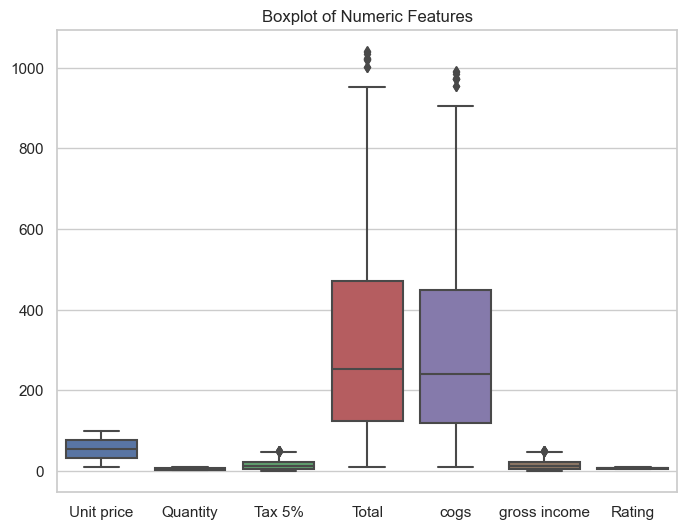

In [382]:
# Visualize outliers using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=outlier_df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']])
plt.title('Boxplot of Numeric Features')
plt.show()

Using InterQuartile Range Method for the 'Total' column:

In [108]:
rating_column = outlier_df['Total']

# Calculate the IQR (Interquartile Range)
Q1 = rating_column.quantile(0.25)
Q3 = rating_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df_iqr = outlier_df[(rating_column < lower_bound) | (rating_column > upper_bound)]
print('Rows with Rating outliers using IQR method:')
outliers_df_iqr

Rows with Rating outliers using IQR method:


,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
166,1,95,10,47,1003,955,47,4,0,15,...,1,0,1,0,0,0,1,0,0,0
167,1,98,10,49,1039,989,49,8,1,7,...,0,1,1,1,0,0,0,0,1,0
350,0,99,10,49,1042,993,49,6,1,14,...,1,0,0,1,0,0,0,0,1,0
357,1,95,10,47,1002,954,47,5,0,8,...,1,0,0,0,0,0,0,1,0,0
422,0,97,10,48,1020,972,48,8,1,7,...,1,0,0,1,0,0,0,0,1,0
557,0,98,10,49,1034,985,49,4,0,29,...,1,0,0,0,1,0,0,0,0,1
699,1,97,10,48,1023,975,48,8,0,11,...,1,0,1,0,0,0,1,0,0,1
792,1,97,10,48,1022,973,48,4,0,14,...,0,0,0,0,0,0,1,0,1,0
996,1,97,10,48,1022,973,48,4,2,1,...,0,0,0,0,0,0,1,0,0,1


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


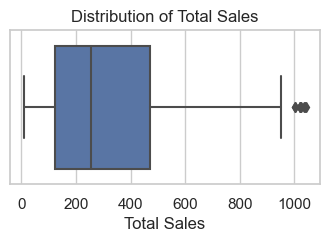

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categori

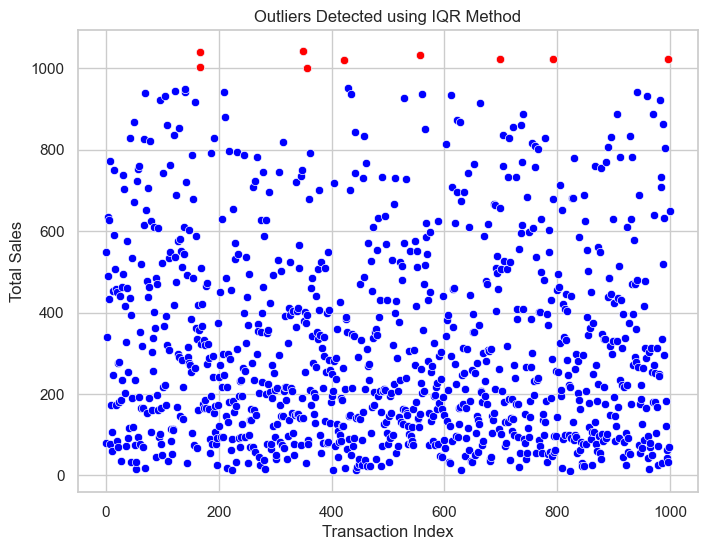

In [118]:
# Visualize the distribution of 'Total' values with boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=outlier_df['Total'])
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.show()

# Visualize the identified outliers using scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=outlier_df.index, y=outlier_df['Total'], label='Normal Transactions', color='blue', legend=False)
sns.scatterplot(x=outliers_df_iqr.index, y=outliers_df_iqr['Total'], label='Outliers', color='red', legend=False)
plt.title('Outliers Detected using IQR Method')
plt.xlabel('Transaction Index')
plt.ylabel('Total Sales')
#plt.legend()
plt.show()


In [119]:
# Separate 'Total' values for normal transactions and outliers
normal_total = outlier_df.loc[~outlier_df.index.isin(outliers_df_iqr.index), 'Total']
outlier_total = outliers_df_iqr['Total']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(normal_total, outlier_total)

# Set the significance level
alpha = 0.05

# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Compare p-value with the significance level
if p_value < alpha:
    print('The null hypothesis is rejected. There is a significant difference in total sales between normal transactions and outliers.')
else:
    print('The null hypothesis cannot be rejected. There is no significant difference in total sales between normal transactions and outliers.')

T-Statistic: -8.916895886005445
P-Value: 2.2421883966112505e-18
The null hypothesis is rejected. There is a significant difference in total sales between normal transactions and outliers.


Using Isolation Forest:

In [384]:
# Extracting Outliers based on the following dimensions: 'Total', 'Unit price', 'cogs', and 'Quantity' columns:
X = outlier_df[['Total', 'Unit price', 'Quantity', 'cogs']]

model = IsolationForest(contamination=0.01)
outlier_df['IsOutlier'] = model.fit_predict(X)
outliers_df_if = outlier_df[outlier_df['IsOutlier'] == -1].copy()
outliers_df_if.drop(columns=['IsOutlier'], inplace=True)

print('Rows with outliers using Isolation Forest method:')
outliers_df_if

Rows with outliers using Isolation Forest method:


,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
166,1,95,10,47,1003,955,47,4,0,15,...,1,0,1,0,0,0,1,0,0,0
167,1,98,10,49,1039,989,49,8,1,7,...,0,1,1,1,0,0,0,0,1,0
350,0,99,10,49,1042,993,49,6,1,14,...,1,0,0,1,0,0,0,0,1,0
357,1,95,10,47,1002,954,47,5,0,8,...,1,0,0,0,0,0,0,1,0,0
422,0,97,10,48,1020,972,48,8,1,7,...,1,0,0,1,0,0,0,0,1,0
435,1,99,9,44,937,893,44,9,2,18,...,1,0,1,0,0,0,0,1,0,1
557,0,98,10,49,1034,985,49,4,0,29,...,1,0,0,0,1,0,0,0,0,1
699,1,97,10,48,1023,975,48,8,0,11,...,1,0,1,0,0,0,1,0,0,1
792,1,97,10,48,1022,973,48,4,0,14,...,0,0,0,0,0,0,1,0,1,0
996,1,97,10,48,1022,973,48,4,2,1,...,0,0,0,0,0,0,1,0,0,1


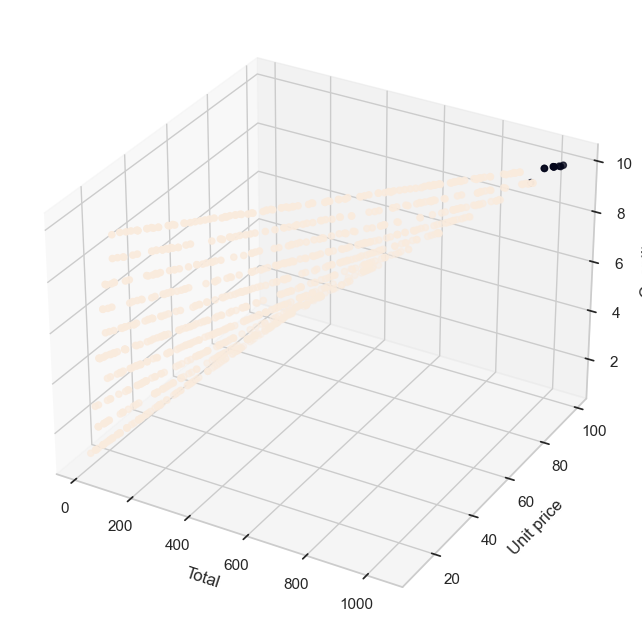

In [386]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(outlier_df['Total'], outlier_df['Unit price'], outlier_df['Quantity'], c=outlier_df['IsOutlier'])
ax.set_xlabel('Total')
ax.set_ylabel('Unit price')
ax.set_zlabel('Quantity')

plt.show()